In [1]:
import pandas as pd
import numpy as np 
import matplotlib as mp
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import scipy.stats as stats
import sklearn.linear_model as skl
import seaborn as sb

# création des fonctions

In [2]:
#fonction pour lire le dataframe 
def read_data(nom_fichier,format_,df="df",header=9):
    if format_=="xlsx" : 
        df=pd.read_excel(nom_fichier,header=header,index_col=[0])
    elif format_=="csv":
        df=pd.read_csv(nom_fichier,header=0,sep=";",index_col=[0])
        
    for col in df.columns:
        if col.startswith("Unnamed:"):
            df=df.drop(columns=[col])
    return df

#fonction pour suivre l'évolution d'une zone géographique 
def evo(dataframe, pays):
    if pays in dataframe.index:
        y = dataframe.loc[pays].values
        x = dataframe.columns
        fig, ax = plt.subplots()
        ax.plot(x, y)
        ax.set_title(f"évolution de rejet CO2 sur 20 ans_{pays}")
        ax.set_xlabel("années")
        ax.set_ylabel("CO2 en tonnes")
        ax.set_xticklabels(x, rotation=90)
    else:
        print(f"Le pays {pays} n'existe pas dans le dataframe")

#fonction pour identifier les secteurs les plus polluants uniquement de la zone Euro 
def top_secteur(dataframe):
    dataframe = dataframe.drop(columns=['Ensemble des activités NACE plus ménages','Total des activités des ménages'])
    df=pd.DataFrame(dataframe.iloc[0,1:].sort_values(ascending=False))
    top_10=df['Union européenne - 27 pays (à partir de 2020)'].nlargest(10)
    #créer camembert 
    fig,ax=plt.subplots(figsize=(10,8)) 
    colors = plt.cm.tab20(np.arange(len(top_10))) # mes couleurs pour chaque portion
    ax.pie(top_10, autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 2, 'edgecolor': 'white', 'width': 0.7}, colors=colors)
    ax.set_title('Les secteurs les plus émetteurs de CO2')
    labels = df.index
    ax.legend(labels=labels, loc="upper right")
    plt.tight_layout()
    return ax

#fonction pour identifier les secteurs les plus polluants pour les pays de la zone Euro
def top_secteur_geo(dataframe,geo):
    dataframe = dataframe.drop(columns=['Ensemble des activités NACE plus ménages','Total des activités des ménages'])
    ligne_geo = pd.DataFrame(dataframe.iloc[:,1:].loc[geo])
    df=ligne_geo.sort_values(by=geo,ascending=False)
    df1=pd.DataFrame(df)
    top_10=df1[geo].nlargest(10)
    #créer un camembert
    fig,ax = plt.subplots(figsize=(10, 8))
    explode = [0.1] * len(top_10) # c'est pour décaler les portions
    colors = plt.cm.tab20(np.arange(len(top_10))) # mes couleurs pour chaque portion
    ax.pie(top_10, autopct='%1.1f%%', startangle=90, explode=explode, wedgeprops={'linewidth': 2, 'edgecolor': 'white', 'width': 0.7}, colors=colors)
    ax.set_title('Les secteurs les plus émetteurs de CO2_'+geo)
    labels = df1.index
    ax.legend(labels=labels, loc="upper right")
    plt.tight_layout()
    return ax

# import de ma première base de donnée 

In [3]:
nom_fichier="emission C02 dans le temps.xlsx"
format_="xlsx"
df="data1"
header=9
data1=read_data(nom_fichier,format_,df,header)
data1.head(5)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, Union européenne - 27 pays (à partir de 2020) to Turquie
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2000    34 non-null     int64  
 1   2001    34 non-null     int64  
 2   2002    34 non-null     int64  
 3   2003    34 non-null     int64  
 4   2004    34 non-null     int64  
 5   2005    34 non-null     int64  
 6   2006    34 non-null     int64  
 7   2007    34 non-null     int64  
 8   2008    34 non-null     int64  
 9   2009    34 non-null     int64  
 10  2010    34 non-null     int64  
 11  2011    34 non-null     int64  
 12  2012    34 non-null     int64  
 13  2013    34 non-null     int64  
 14  2014    34 non-null     int64  
 15  2015    34 non-null     int64  
 16  2016    34 non-null     int64  
 17  2017    34 non-null     int64  
 18  2018    34 non-null     int64  
 19  2019    34 non-null     int64  
 20  2020    34 non-null     float64
 2

In [4]:
data1.head(5)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
GEO,,,,,,,,,,,,,,,,,,,,,
Union européenne - 27 pays (à partir de 2020),1054766974,1060965612,1053258634,1087676971,1098193127,1121722711,1139619440,1159584180,3834732998,3472982728,...,3529415965,3414106849,3291466439,3333934337,3314637746,3362293826,3311526634,3139483590,2.876184e+09,2.971961e+09
Belgique,0,0,0,0,0,0,0,0,87456620,76557466,...,73292150,71245596,68827160,71719828,71219537,71206016,72589318,73283194,6.636230e+07,6.831372e+07
Bulgarie,0,0,0,0,0,0,0,0,53216214,45014734,...,47139088,41683744,44452912,47139786,44542644,46707898,42543330,41139871,3.553341e+07,4.072877e+07
Tchéquie,0,0,0,0,0,0,0,0,103261092,94780439,...,89526626,85468877,84638194,83538884,85679683,84021671,85346829,80143543,7.166908e+07,7.698816e+07
Danemark,66341969,66825242,68073933,76971284,72810332,77421616,95269012,91941254,86111180,79787984,...,71209687,69951565,64110612,64364513,67178701,67395653,69897227,66816143,5.716105e+07,5.221552e+07


In [5]:
data1t = data1.T
data1t = data1t[["Union européenne - 27 pays (à partir de 2020)", "France"]]
data1t.describe()

GEO,Union européenne - 27 pays (à partir de 2020),France
count,2.200000e+01,2.200000e+01
mean,2.538019e+09,1.542377e+08
std,1.132845e+09,1.207745e+08
min,1.053259e+09,0.000000e+00
25%,1.126197e+09,0.000000e+00
50%,3.215475e+09,2.288144e+08
75%,3.401154e+09,2.499422e+08
max,3.834733e+09,2.850926e+08


/var/folders/74/5kft2k5d2yn3h6jgfztsw7d80000gr/T/ipykernel_24991/73316983.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=90)


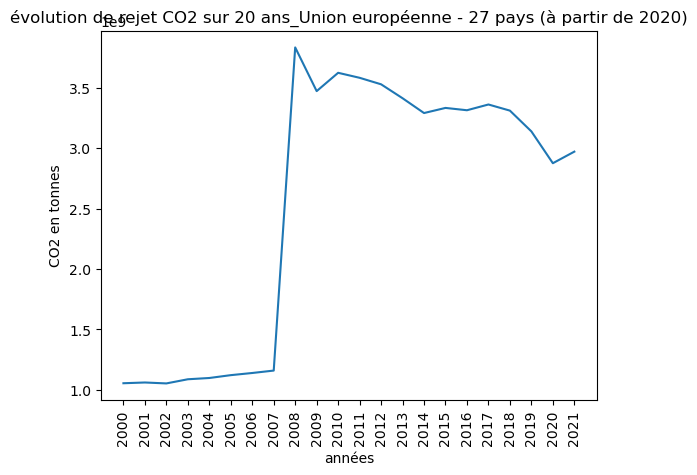

In [6]:
#voir l'évolution de CO2 pour la zone euro 
evo(data1,"Union européenne - 27 pays (à partir de 2020)")

/var/folders/74/5kft2k5d2yn3h6jgfztsw7d80000gr/T/ipykernel_24991/73316983.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=90)


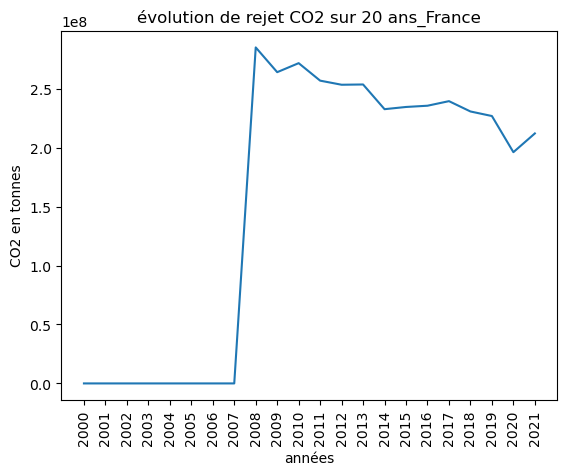

In [7]:
#voir l'évolution de CO2 pour la france 
evo(data1,"France")

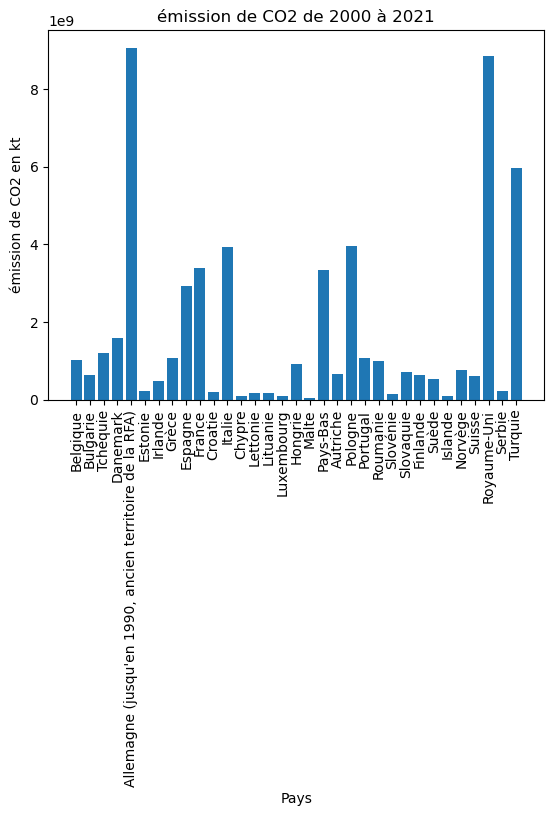

In [8]:
#graphique sur les émissions de CO2 
#créer une colonne qui fait la somme de toutes les pays
data1["total des émissions"] = data1.sum(axis=1)
#créer histogramme 
total = data1.iloc[1:, -1]
bins = np.linspace(-90, 100, 100)
# Créer le plot en utilisant la méthode .bar() de matplotlib
fig, ax = plt.subplots()
ax.bar(total.index, total)

# Ajouter des labels pour les axes et le titre
ax.set_xlabel('Pays')
ax.set_ylabel('émission de CO2 en kt')
ax.set_title('émission de CO2 de 2000 à 2021')

# Faire pivoter les labels sur l'axe x pour améliorer la lisibilité
ax.tick_params(axis='x', rotation=90)

# Afficher le plot
plt.show()

# déterminer la corrélation entre france et UE

calcul du taux d'évolution de co2 

In [9]:
#calcul du taux d'évolution en commencant par 2008
pourcentage_df = pd.DataFrame(columns=data1.columns)



for col in data1.columns[8:]:
    p = ((data1[col] - data1.loc[:,'2008']) / data1.loc[:,"2008"])*100
    pourcentage_df[col] = p

pourcentage_df.tail(20)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,total des émissions
GEO,,,,,,,,,,,,,,,,,,,,,
Lettonie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-16.743593,...,-18.546633,-20.768785,-17.456458,-19.270007,-18.115664,-10.715946,-10.233345,-27.447671,-24.598098,1806.922928
Lituanie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-16.689630,...,-14.567506,-9.450919,-4.966526,-7.423028,-0.419650,7.975406,10.667858,22.128148,25.510751,1286.968797
Luxembourg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.298795,...,-11.185206,-8.238209,3.266551,1.123016,0.815214,2.699890,11.208900,-0.904769,3.523895,1287.952489
Hongrie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-12.372250,...,-24.000326,-23.062150,-18.907599,-19.716589,-15.413275,-14.595529,-17.554425,-23.967723,-23.273558,1885.707962
Malte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-7.112650,...,-10.677454,-10.574773,-37.164931,-49.101551,-42.716296,-41.135386,-36.743320,-44.611877,-44.992496,1758.978589
Pays-Bas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-3.899491,...,-6.387465,-6.315388,-2.997009,-3.569092,-5.083967,-7.384573,-9.371566,-20.381995,-19.875990,2003.181722
Autriche,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-10.891185,...,-14.780161,-19.169512,-17.217470,-18.545722,-13.053236,-16.648926,-10.595560,-20.782043,-15.341671,1119.183378
Pologne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-5.382319,...,-3.634724,-6.585786,-5.723784,-2.913991,1.449709,1.786827,-2.116432,-6.881761,0.870483,1267.932416
Portugal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-5.706903,...,-19.295986,-19.536518,-11.468300,-15.806081,-6.536970,-13.056246,-20.262808,-31.775758,-34.760268,1943.392400


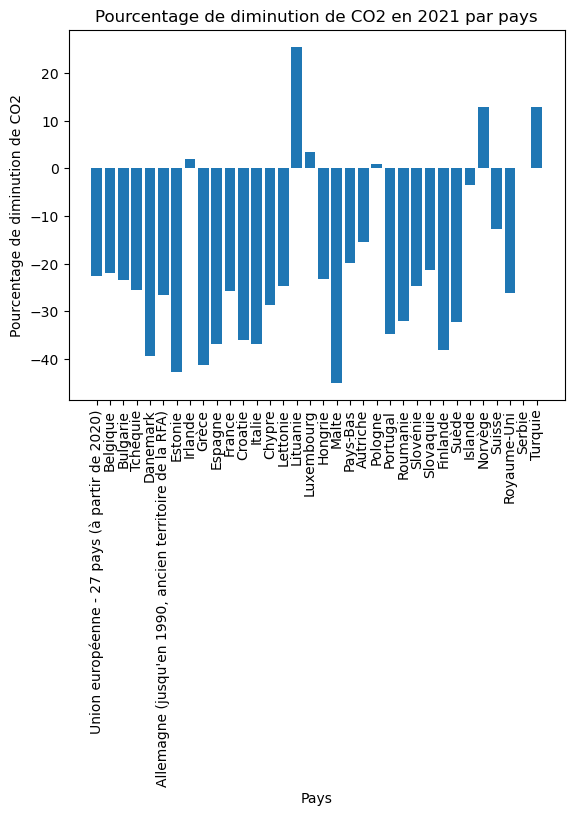

In [10]:
#création du graphique 
data_2020 = pourcentage_df['2021']
bins = np.linspace(-90, 100, 100)
# Créer le plot en utilisant la méthode .bar() de matplotlib
fig, ax = plt.subplots()
ax.bar(data_2020.index, data_2020)

# Ajouter des labels pour les axes et le titre
ax.set_xlabel('Pays')
ax.set_ylabel('Pourcentage de diminution de CO2')
ax.set_title('Pourcentage de diminution de CO2 en 2021 par pays')

# Faire pivoter les labels sur l'axe x pour améliorer la lisibilité
ax.tick_params(axis='x', rotation=90)

# Afficher le plot
plt.show()

# import de la base de donnée niveau d'éducation

In [11]:
nom_fichier="classeur1.xlsx"
format_="xlsx"
df="data2"
header=9
data2=read_data(nom_fichier,format_,df,header)

data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, Irlande to Turquie
Data columns (total 6 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                           --------------  -----  
 0   Inférieur à l'enseignement primaire, enseignement primaire et premier cycle de l'enseignement secondaire (niveaux 0-2)           34 non-null     float64
 1   Deuxième cycle de l'enseignement secondaire, enseignement post-secondaire non-supérieur et enseignement supérieur (niveaux 3-8)  34 non-null     float64
 2   Deuxième cycle de l'enseignement secondaire et enseignement post-secondaire non-supérieur (niveaux 3 et 4)                       34 non-null     float64
 3   Deuxième cycle de l'enseignement secondaire et enseignement post-secondaire non-supérieur (niveau

In [12]:
data2.head(5)

,"Inférieur à l'enseignement primaire, enseignement primaire et premier cycle de l'enseignement secondaire (niveaux 0-2)","Deuxième cycle de l'enseignement secondaire, enseignement post-secondaire non-supérieur et enseignement supérieur (niveaux 3-8)",Deuxième cycle de l'enseignement secondaire et enseignement post-secondaire non-supérieur (niveaux 3 et 4),Deuxième cycle de l'enseignement secondaire et enseignement post-secondaire non-supérieur (niveaux 3 et 4) - général,Deuxième cycle de l'enseignement secondaire et enseignement post-secondaire non-supérieur (niveaux 3 et 4) - professionnel,Enseignement supérieur (niveaux 5-8)
GEO,,,,,,
Irlande,18.9,81.1,36.9,22.3,12.9,44.2
Luxembourg,25.6,74.4,30.7,0.0,30.7,43.6
Chypre,21.2,78.8,38.0,26.2,11.8,40.8
Norvège,24.1,75.9,35.9,11.8,24.1,40.0
Suède,20.4,79.6,40.4,17.1,23.4,39.2


In [13]:
#concaténation entre data1["2021"] et data2 pour étudier une quelconque relation 
df_concat= pd.concat([data2, data1["2021"]], axis=1)
df_concat=df_concat.drop("Union européenne - 27 pays (à partir de 2020)",axis=0)

for col in df_concat.columns:
    if df_concat[col].isnull().any():
        df_concat[col].fillna(data1[col].mean(), inplace=True)
        
df_concat.head(20)

,"Inférieur à l'enseignement primaire, enseignement primaire et premier cycle de l'enseignement secondaire (niveaux 0-2)","Deuxième cycle de l'enseignement secondaire, enseignement post-secondaire non-supérieur et enseignement supérieur (niveaux 3-8)",Deuxième cycle de l'enseignement secondaire et enseignement post-secondaire non-supérieur (niveaux 3 et 4),Deuxième cycle de l'enseignement secondaire et enseignement post-secondaire non-supérieur (niveaux 3 et 4) - général,Deuxième cycle de l'enseignement secondaire et enseignement post-secondaire non-supérieur (niveaux 3 et 4) - professionnel,Enseignement supérieur (niveaux 5-8),2021
GEO,,,,,,,
Irlande,18.9,81.1,36.9,22.3,12.9,44.2,3.179231e+07
Luxembourg,25.6,74.4,30.7,0.0,30.7,43.6,7.654944e+06
Chypre,21.2,78.8,38.0,26.2,11.8,40.8,5.421708e+06
Norvège,24.1,75.9,35.9,11.8,24.1,40.0,5.536447e+07
Suède,20.4,79.6,40.4,17.1,23.4,39.2,3.073740e+07
Lituanie,10.4,89.6,50.5,21.6,29.0,39.1,1.667036e+07
Belgique,23.8,76.2,37.4,13.3,24.1,38.8,6.831372e+07
Suisse,17.4,82.6,44.0,9.6,34.3,38.6,2.519734e+07
Pays-Bas,24.6,75.4,38.6,11.4,27.2,36.8,1.272158e+08


<AxesSubplot:>

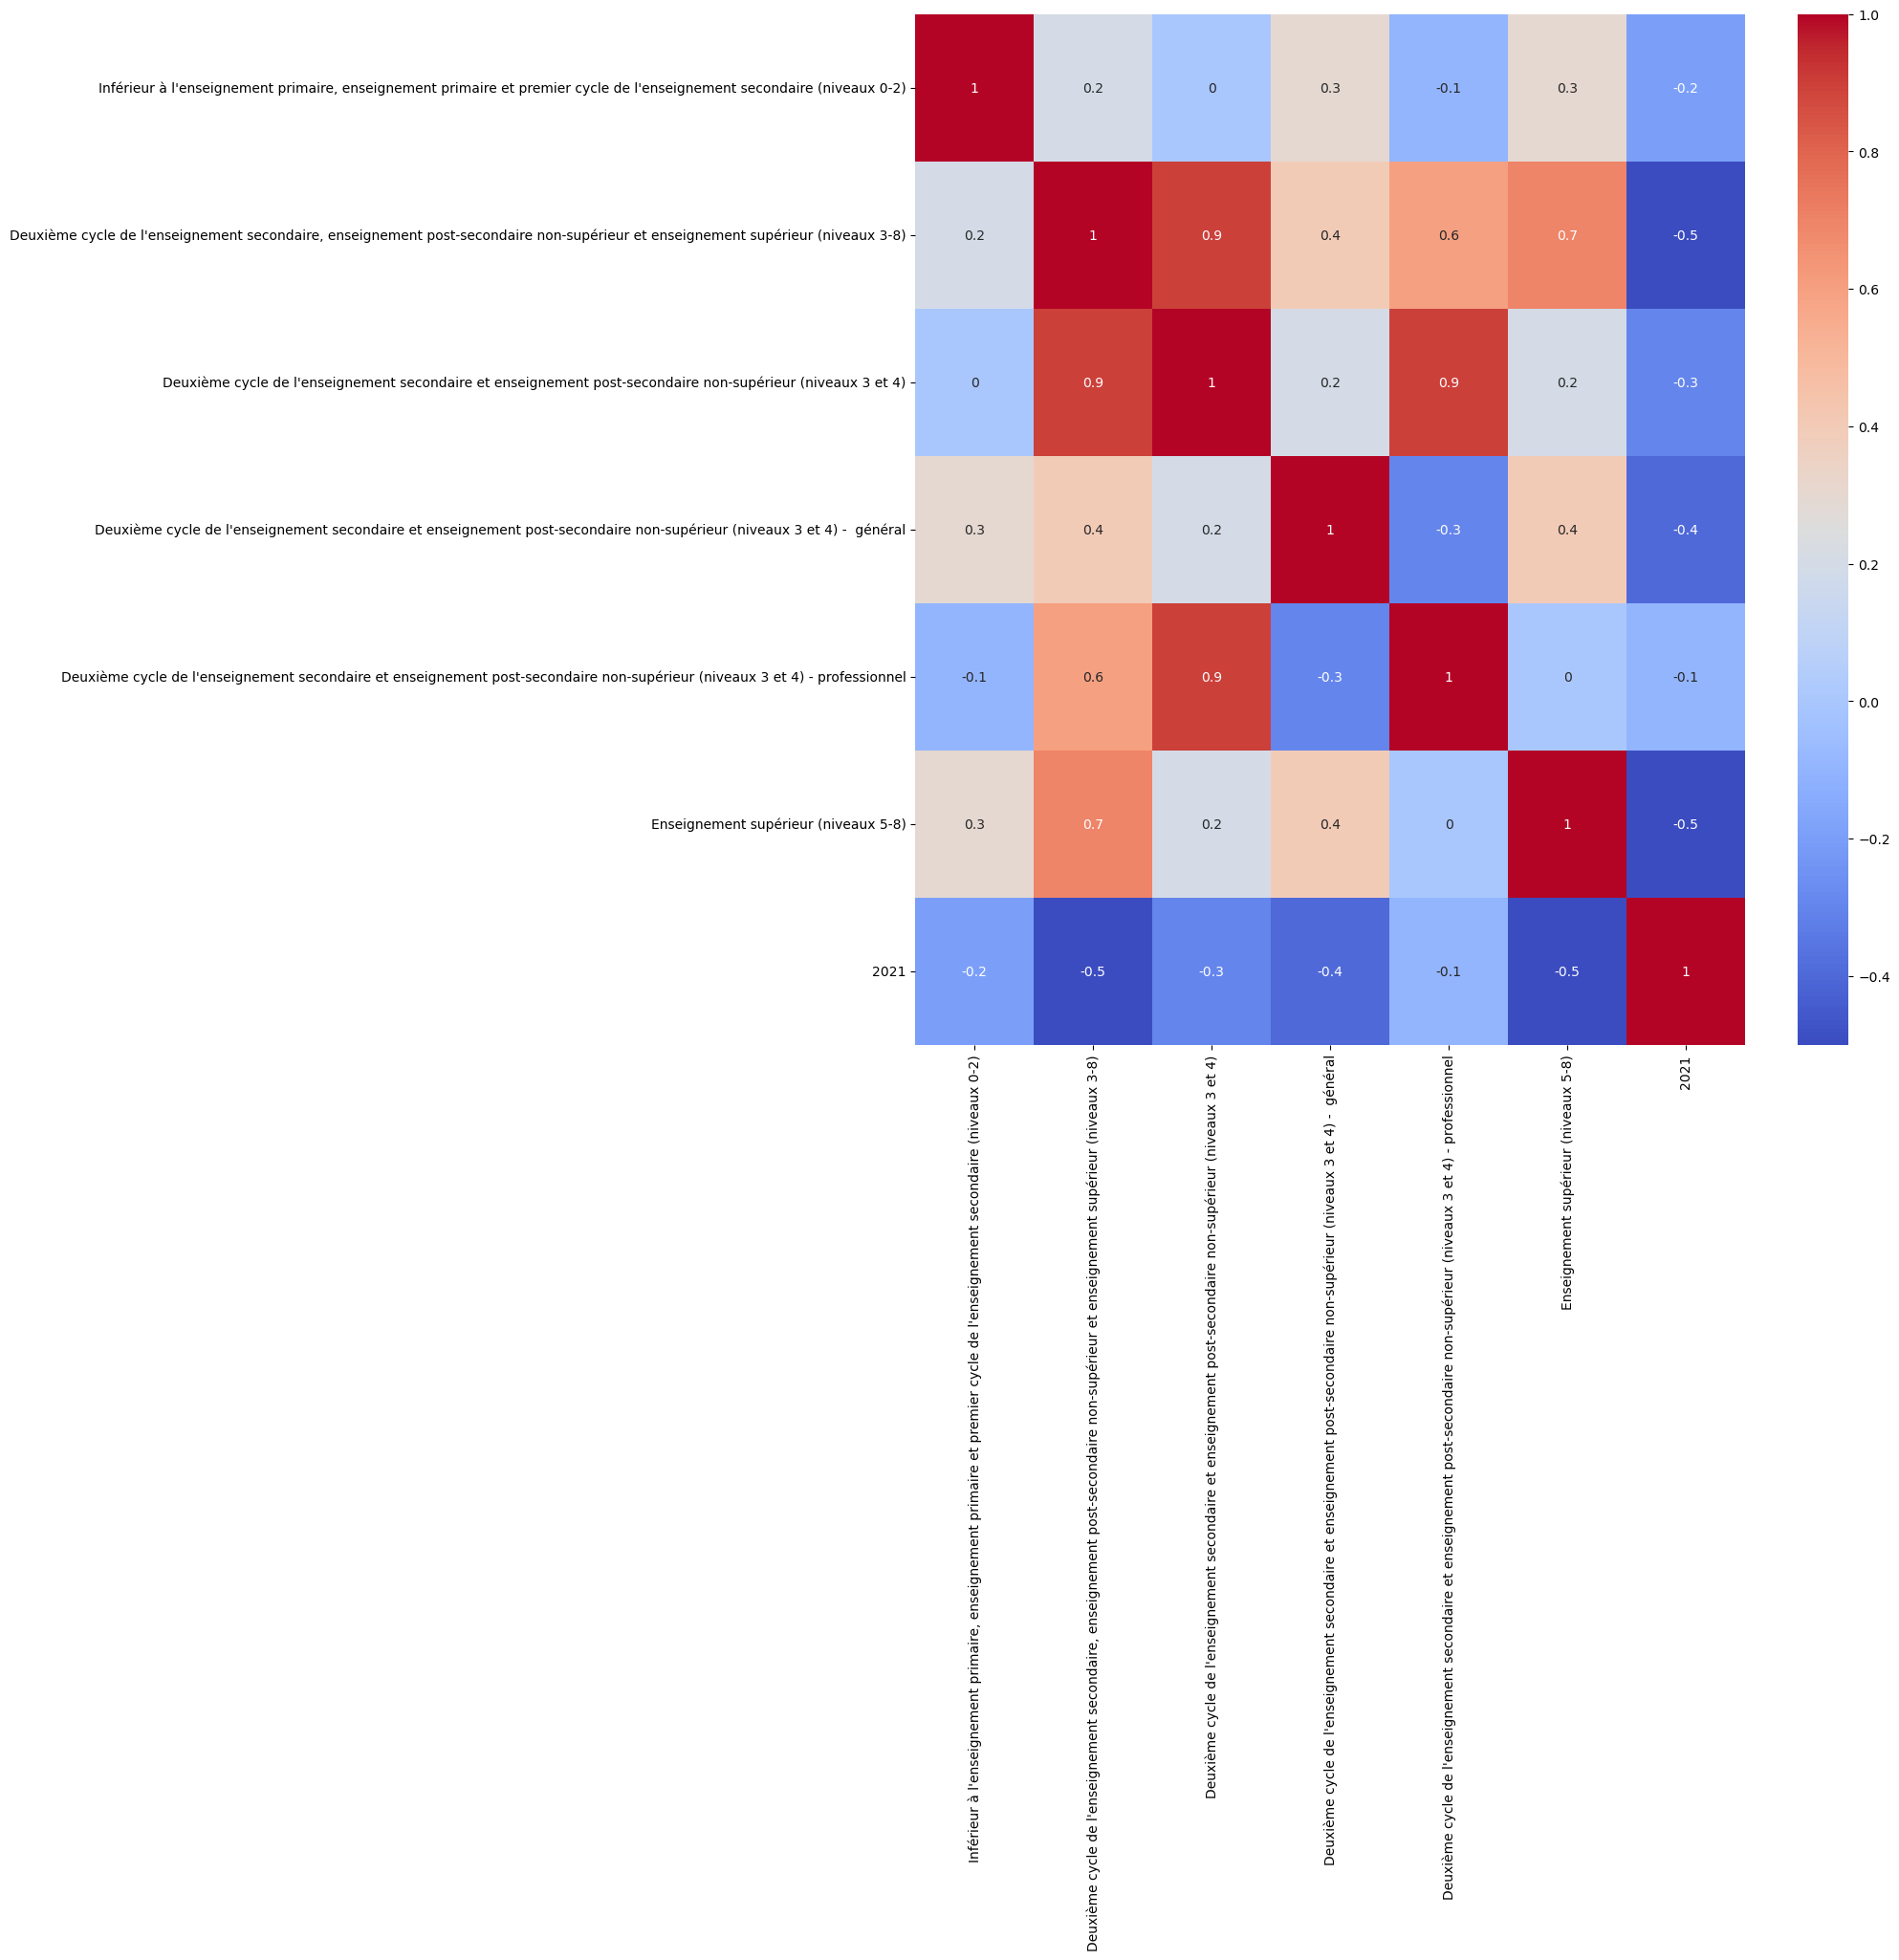

In [14]:
#faire une grille de corrélation 
matrice_corr = df_concat.corr().round(1)
fig, ax = plt.subplots(figsize=(14,14))
sb.heatmap(data=matrice_corr, annot=True, annot_kws={'size': 10}, cmap='coolwarm', ax=ax)

In [15]:
""""
préparer les données
tester l'indépendance des variables X
puis faire un nuage de point entre X=UE et Y=France 
"""
#préparer les données 
# conversion des données en tableau NumPy
y = np.asarray(df_concat["2021"], dtype=float)
X1 = np.asarray(df_concat["Inférieur à l'enseignement primaire, enseignement primaire et premier cycle de l'enseignement secondaire (niveaux 0-2)"], dtype=float)
X2 = np.asarray(df_concat["Deuxième cycle de l'enseignement secondaire et enseignement post-secondaire non-supérieur (niveaux 3 et 4)"], dtype=float)
X3 = np.asarray(df_concat["Enseignement supérieur (niveaux 5-8)"], dtype=float)


print(y.shape)
print(X1.shape)
print(X2.shape)
print(X3.shape)

""""
on va tester l'indépendance des variables explicatives 
""""
from scipy.stats import pearsonr

# Calculer le coefficient de corrélation de rang de Spearman et la p-valeur
corr1, pval1 = pearsonr(X1, X2)
corr2, pval2 = pearsonr(X1, X3)
corr3, pval3 = pearsonr(X2, X3)

#afficher les résultats
print("Corrélation entre X1 et X2:", corr1, "p-valeur:", pval1)
print("Corrélation entre X1 et X3:", corr2, "p-valeur:", pval2)
print("Corrélation entre X2 et X3:", corr3, "p-valeur:", pval3)

if pval1<0.05 and pval2<0.05 and pval3<0.05 :
    print ("Les variables sont dépendantes (H0 rejetée)")
else : 
    print("Les variables sont indépendantes (H0 non rejetée)")


SyntaxError: EOL while scanning string literal (3254080640.py, line 21)

In [16]:
""""
préparer les données 
puis faire un nuage de point puis tester l'existence d'une corrélation 
"""
#préparer les données 
y = np.asarray(df_concat["2021"], dtype=float)

# créer un nuage de points
plt.scatter(X1, y, label='Niveaux 0-2')
plt.xlabel("niveau d'éducation 0-2")
plt.ylabel("Emissions de CO2 dans la zone UE en 2021")
plt.legend()

#ajouter une pente 
coefficients = np.polyfit(X1, y, 1)
pente = coefficients[0]
ordonnee_origine = coefficients[1]
print("Pente de la droite de régression:", pente)
print("Ordonnée à l'origine de la droite de régression:", ordonnee_origine)

# Tracer la droite de régression
plt.plot(X1, pente * X1 + ordonnee_origine, color='red')

# Afficher le nuage de points avec la droite de régression
plt.scatter(X1, y, label='Niveaux 0-2')
plt.xlabel("niveau d'éducation")
plt.ylabel("Emissions de CO2 dans la zone UE en 2021")
plt.legend()
plt.show()

# calculer le coefficient de corrélation
corr1, _ = pearsonr(X1, y)
print("Coefficients de corrélation de pearson :")
print("Niveaux 0-2:", corr1)

plt.show()
plt.show()

NameError: name 'X1' is not defined

In [17]:
# créer un nuage de points
plt.scatter(X2, y, label='Niveaux 3-4')
plt.xlabel("niveau d'éducation 3-4")
plt.ylabel("Emissions de CO2 dans la zone UE en 2021")
plt.legend()

#ajouter une pente 
coefficients = np.polyfit(X2, y, 1)
pente = coefficients[0]
ordonnee_origine = coefficients[1]
print("Pente de la droite de régression:", pente)
print("Ordonnée à l'origine de la droite de régression:", ordonnee_origine)

# Tracer la droite de régression
plt.plot(X2, pente * X2 + ordonnee_origine, color='red')

# Afficher le nuage de points avec la droite de régression
plt.scatter(X2, y, label='Niveaux 3-4')
plt.xlabel("niveau d'éducation")
plt.ylabel("Emissions de CO2 dans la zone UE en 2021")
plt.legend()
plt.show()

# calculer le coefficient de corrélation
corr2, _ = pearsonr(X2, y)
print("Coefficients de corrélation de pearson :")
print("Niveaux 3-4:", corr2)

plt.show()

NameError: name 'X2' is not defined

In [18]:
# créer un nuage de points
plt.scatter(X3, y, label='Niveaux 5-8')
plt.xlabel("niveau d'éducation 5-8")
plt.ylabel("Emissions de CO2 dans la zone UE en 2021")
plt.legend()

#ajouter une pente 
coefficients = np.polyfit(X3, y, 1)
pente = coefficients[0]
ordonnee_origine = coefficients[1]
print("Pente de la droite de régression:", pente)
print("Ordonnée à l'origine de la droite de régression:", ordonnee_origine)

# Tracer la droite de régression
plt.plot(X3, pente * X3 + ordonnee_origine, color='red')

# Afficher le nuage de points avec la droite de régression
plt.scatter(X3, y, label='Niveaux 0-2')
plt.xlabel("niveau d'éducation")
plt.ylabel("Emissions de CO2 dans la zone UE en 2021")
plt.legend()
plt.show()

# calculer le coefficient de corrélation
corr3, _ = pearsonr(X3, y)
print("Coefficients de corrélation de pearson:")
print("Niveaux 5-8:", corr3)

plt.show()

NameError: name 'X3' is not defined

In [19]:
""""
ci dessus la linéarité n'est pas bien représentée, on va abandonner la relation linéaire, 
et se satisfaire d’une relation monotone entre les deux variables numériques continues
en gros on va prouver l'existence d'une corrélation entre y et les X via spearman 
"""
from scipy.stats import spearmanr

# Calculer le coefficient de corrélation de rang de Spearman et la p-valeur
corr1, pval1 = spearmanr(y, X1)
corr2, pval2 = spearmanr(y, X2)
corr3, pval3 = spearmanr(y, X3)

#afficher les résultats
print("Corrélation entre y et X2:", corr1, "p-valeur:", pval1)
print("Corrélation entre y et X3:", corr2, "p-valeur:", pval2)
print("Corrélation entre y et X3:", corr3, "p-valeur:", pval3)



NameError: name 'X1' is not defined

In [20]:
# ajouter une colonne de 1 pour représenter l'interception
X = sm.add_constant(X3)

# ajuster un modèle linéaire avec OLS
modele = sm.OLS(y, X3)
resultats = modele.fit()

# afficher les coefficients estimés
print(resultats.params)
print(resultats.summary())

NameError: name 'X3' is not defined

In [21]:
#prouver l'égalité des variances 
#calculer les y_pred 
y_pred = modele.predict(X)

NameError: name 'modele' is not defined

# import de la base de donnée sur les secteurs polluants

In [22]:
nom_fichier="emission CO2 par secteur sur 20 ans.xlsx"
format_="xlsx"
df="data3"
header=9
data3=read_data(nom_fichier,format_,df,header)
data3.head(5)

,Total - ensemble des activités NACE,"Agriculture, sylviculture et pêche","Culture et production animale, chasse et services annexes",Sylviculture et exploitation forestière,Pêche et aquaculture,Industries extractives,Industrie manufacturière,Industries alimentaires; fabrication de boissons et de produits à base de tabac,"Fabrication de textiles, industrie de l'habillement, du cuir et de la chaussure","Travail du bois et fabrication d'articles en bois et en liège, à l'exception des meubles; fabrication d'articles en vannerie et sparterie",...,Activités des organisations associatives,Réparation d'ordinateurs et de biens personnels et domestiques,Autres services personnels,Activités des ménages en tant qu'employeurs; activités indifférenciées des ménages en tant que producteurs de biens et services pour usage propre,Activités extra-territoriales,Ensemble des activités NACE plus ménages,Total des activités des ménages,Chauffage/refroidissement par les ménages,Activités de transport des ménages,Autres activités par les ménages
GEO,,,,,,,,,,,,,,,,,,,,,
Union européenne - 27 pays (à partir de 2020),2246228835,100552680,90459325,4242234,5851121,22996661,761062316,50954562,6184749,3899343,...,3951422,1049480,5473230,187894,303,2944168666,697939830,308114692,383668289,6156850
Belgique,68313719,3066766,2850150,50151,166465,419415,32376361,2657181,199904,47942,...,86972,27678,390561,155187,0,95129662,26815943,15761563,10537617,516762
Bulgarie,40728766,766604,710153,53013,3439,269370,8997611,421096,65880,67545,...,4331,6754,1077,0,0,43776181,3047415,657787,2370887,18741
Tchéquie,76988157,1716009,1661165,40473,14371,3633311,19591148,1304349,98638,206835,...,7563,6864,24869,0,0,88553905,11565748,7842616,3723132,0
Danemark,52215519,1750790,1370423,57860,322508,929943,5352636,781403,14526,19713,...,17078,15775,28993,0,0,58443735,6228216,1635956,4528249,64011


In [23]:
print(data3.info())

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, Union européenne - 27 pays (à partir de 2020) to Turquie
Data columns (total 83 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype
---  ------                                                                                                                                                         --------------  -----
 0   Total - ensemble des activités NACE                                                                                                                            34 non-null     int64
 1   Agriculture, sylviculture et pêche                                                                                                                             34 non-null     int64
 2   Culture et production animale, chasse et services annexes                                               

<AxesSubplot:title={'center':'Les secteurs les plus émetteurs de CO2'}>

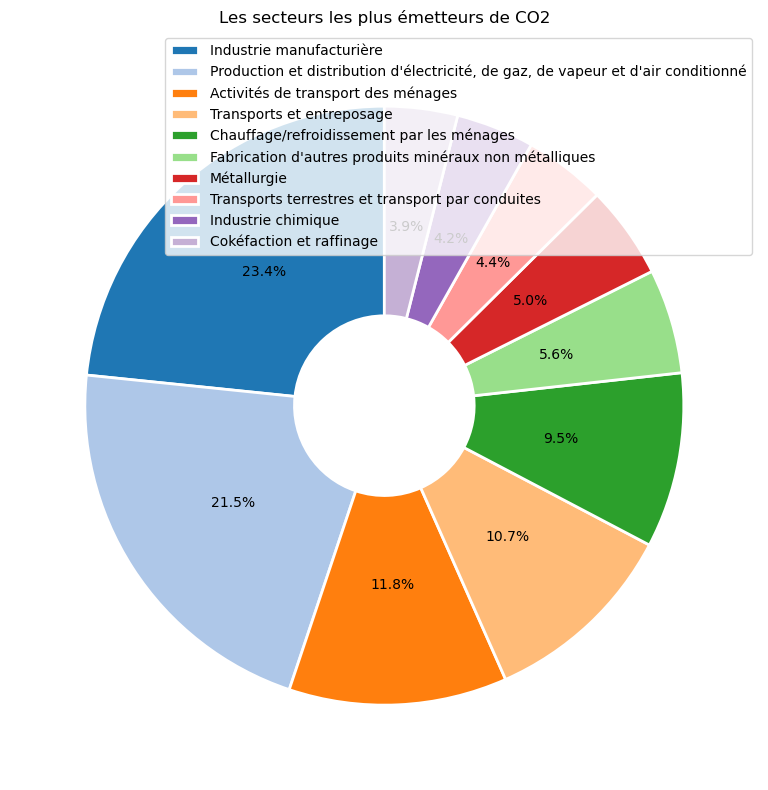

In [24]:
#pour la zone euro 
top_secteur(data3)

<AxesSubplot:title={'center':'Les secteurs les plus émetteurs de CO2_France'}>

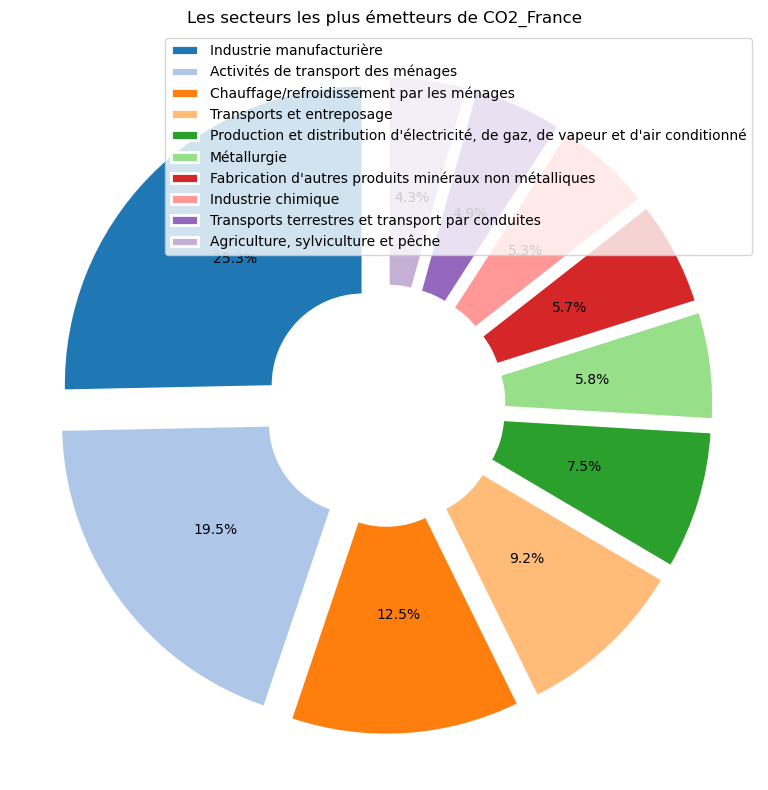

In [25]:
#pour la Fronce 
top_secteur_geo(data3,"France")

# import de la bdd enquête de l'ADEME

In [279]:
nom_fichier="Opinion- Baromètre changement climatique - Compilation 2000-2022-2.csv"
format_="csv"
df="data4"
header=0
data4=read_data(nom_fichier,format_,df,header)
data4.head(5)

/var/folders/74/5kft2k5d2yn3h6jgfztsw7d80000gr/T/ipykernel_98193/73316983.py:6: DtypeWarning: Columns (6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,41,42,43,44,45,46,47,48,49,50,51,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,166,169,170,171,172,173,174,176,177,180,182) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(nom_fichier,header=0,sep=";",index_col=[0])


,S1. genre,S2. âge,S3. Zone géo,Région,Département,S7. Taille commune,S7b. Taille commune,S7c. Taille commune,S6. Situation professionnelle,S5. CSP,...,s21_i4. Importance niveau de vie,s21. Importance environnement,s22. Mode de transport,s23. Partis politiques,s24. Echiquier politique,s25. Sympathie mouvements écologistes,poids,UC,age,insee
Vague,,,,,,,,,,,,,,,,,,,,,
Vague 01,Un homme,65 ans et +,Nord Est,Alsace - Champagne - Ardennes - Lorraine,Meurthe-et-Moselle,NaN,En zone rurale,NaN,NaN,NaN,...,NaN,NaN,En voiture (même si vous n'êtes pas le conduct...,NaN,NaN,...assez de sympathie ?,"0,57037040",NaN,"68,0",NaN
Vague 01,Un homme,35-49 ans,Nord Est,Alsace - Champagne - Ardennes - Lorraine,Meurthe-et-Moselle,NaN,Dans une agglomération de 100.000 habitants et...,NaN,NaN,NaN,...,NaN,NaN,En voiture (même si vous n'êtes pas le conduct...,NaN,NaN,...assez de sympathie ?,"1,11267610",NaN,"40,0",NaN
Vague 01,Un homme,25-34 ans,Ile de France,Ile de France,Seine-Saint-Denis,NaN,Dans l'agglomération parisienne,NaN,NaN,NaN,...,NaN,NaN,En voiture (même si vous n'êtes pas le conduct...,NaN,NaN,...assez de sympathie ?,"1,11267610",NaN,"34,0",NaN
Vague 01,Une femme,35-49 ans,Ile de France,Ile de France,Seine-Saint-Denis,NaN,Dans l'agglomération parisienne,NaN,NaN,NaN,...,NaN,NaN,En transports en commun urbains (dont métro),NaN,NaN,...assez de sympathie ?,"0,57037040",NaN,"40,0",NaN
Vague 01,Un homme,15-17 ans,Sud Ouest,Aquitaine - Limousin - Poitou - Charente,Corrèze,NaN,Dans une ville de 20.000 à moins de 100.000 ha...,NaN,NaN,NaN,...,NaN,NaN,En voiture (même si vous n'êtes pas le conduct...,NaN,NaN,No rep.,"2,42391300",NaN,"15,0",NaN


In [280]:
print(data4.info())

<class 'pandas.core.frame.DataFrame'>
Index: 27868 entries, Vague 01 to Vague 23
Columns: 182 entries, S1. genre to insee
dtypes: object(182)
memory usage: 38.9+ MB
None


In [283]:
#je créer un df qui comme colonne les moda de "q1_1. Enjeu important 1" et en en index les moda de "s20.revenus"
df_enjeuecolo= pd.DataFrame(data=data4['q1_1. Enjeu important 1'], index=data4['s20. Revenus'].unique(), columns=data4['q1_1. Enjeu important 1'].unique())
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, nan to No rep.
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   nan                                         0 non-null      object
 1   La hausse des prix                          0 non-null      object
 2   L'emploi                                    0 non-null      object
 3   Les déficits publics et la dette de l'Etat  0 non-null      object
 4   Le logement                                 0 non-null      object
 5   L'environnement/La transition écologique    0 non-null      object
 6   L'éducation et la recherche                 0 non-null      object
 7   Les inégalités                              0 non-null      object
 8   La sécurité des biens et des personnes      0 non-null      object
 9   Les impôts et taxes                         0 non-null      object
 10  L'immigration             

In [286]:
#je complète le df avec le nombre d'occurrences de chaque combinaison de "q1_1. Enjeu important 1" et "s20. Revenus" dans le DataFrame original data3
for i in df_enjeuecolo.columns:
    for j in df_enjeuecolo.index:
        df_enjeuecolo.loc[j, i] = data4[(data4['q1_1. Enjeu important 1'] == i) & (data4['s20. Revenus'] == j)]['s20. Revenus'].count()
        
        
df_enjeuecolo.head(5)

,NaN,La hausse des prix,L'emploi,Les déficits publics et la dette de l'Etat,Le logement,L'environnement/La transition écologique,L'éducation et la recherche,Les inégalités,La sécurité des biens et des personnes,Les impôts et taxes,L'immigration,Les banlieues,No rep.,Les transports,La santé publique
NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
De 2 000 à 2 999 Euros par mois,0,329,485,198,50,241,92,226,222,164,339,10,7,6,125
5 000 Euros et plus par mois,0,44,166,124,9,78,41,50,70,69,97,3,1,3,39
De 3 000 à 3 499 Euros par mois,0,167,247,137,18,151,56,117,135,97,181,6,1,8,75
De 1 000 à 1 499 Euros par mois,0,187,215,51,33,97,29,97,86,62,161,10,5,9,41


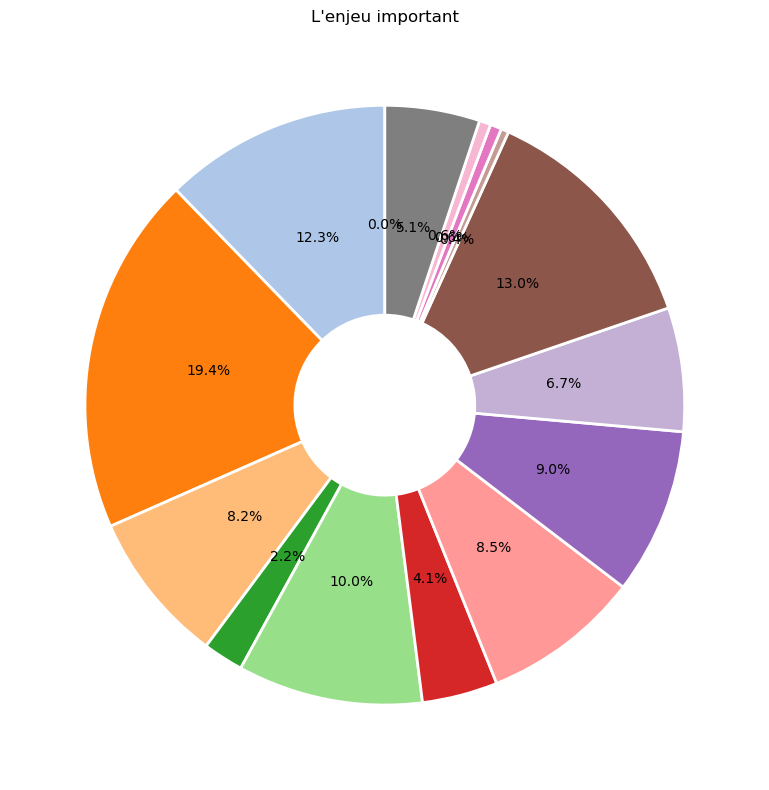

In [287]:
#créer un index supplémentaire qui contient la somme 
tout_niveau=df_enjeuecolo.sum()
fig,ax=plt.subplots(figsize=(12,8)) 
colors = plt.cm.tab20(np.arange(len(tout_niveau))) # mes couleurs pour chaque portion
ax.pie(tout_niveau, autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 2, 'edgecolor': 'white', 'width': 0.7}, colors=colors)
ax.set_title("L'enjeu important")
labels = test.columns
plt.tight_layout()

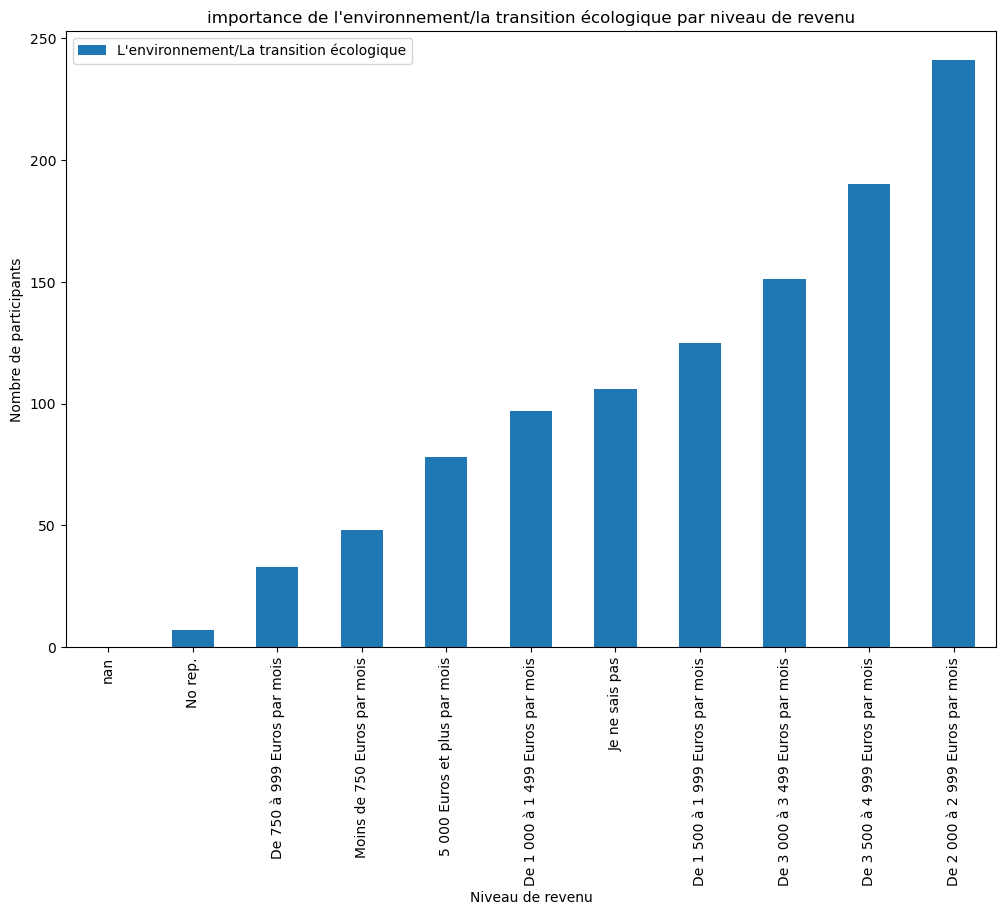

In [288]:
#trier les valeurs 
df_enjeuecolo=test.sort_values(by="L'environnement/La transition écologique")

#créer un diagramme en barre 
df_enjeuecolo["L'environnement/La transition écologique"].plot(kind='bar', stacked=True, figsize=(12,8))
plt.title("importance de l'environnement/la transition écologique par niveau de revenu")
plt.xlabel("Niveau de revenu")
plt.ylabel("Nombre de participants")
plt.legend(loc="best")
plt.show()

In [290]:
#je créer un df qui comme colonne les moda de "q1_1. Enjeu important 1" et en en index les moda de "s15 Diplomes"
df_diplome= pd.DataFrame(data=data4['q1_1. Enjeu important 1'], index=data4['s15. Diplôme'].unique(), columns=data4['q1_1. Enjeu important 1'].unique())
df_diplome.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 2EME, 3EME CYCLE UNIVERSITAIRE OU GRANDES ECOLES to Sans diplôme
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   nan                                         0 non-null      object
 1   La hausse des prix                          0 non-null      object
 2   L'emploi                                    0 non-null      object
 3   Les déficits publics et la dette de l'Etat  0 non-null      object
 4   Le logement                                 0 non-null      object
 5   L'environnement/La transition écologique    0 non-null      object
 6   L'éducation et la recherche                 0 non-null      object
 7   Les inégalités                              0 non-null      object
 8   La sécurité des biens et des personnes      0 non-null      object
 9   Les impôts et taxes                         0 non

In [291]:
#je complète le df avec le nombre d'occurrences de chaque combinaison de "q1_1. Enjeu important 1" et "s20. Revenus" dans le DataFrame original data3
for i in df_diplome.columns:
    for j in df_diplome.index:
        df_diplome.loc[j, i] = data4[(data4['q1_1. Enjeu important 1'] == i) & (data4['s15. Diplôme'] == j)]['s15. Diplôme'].count()

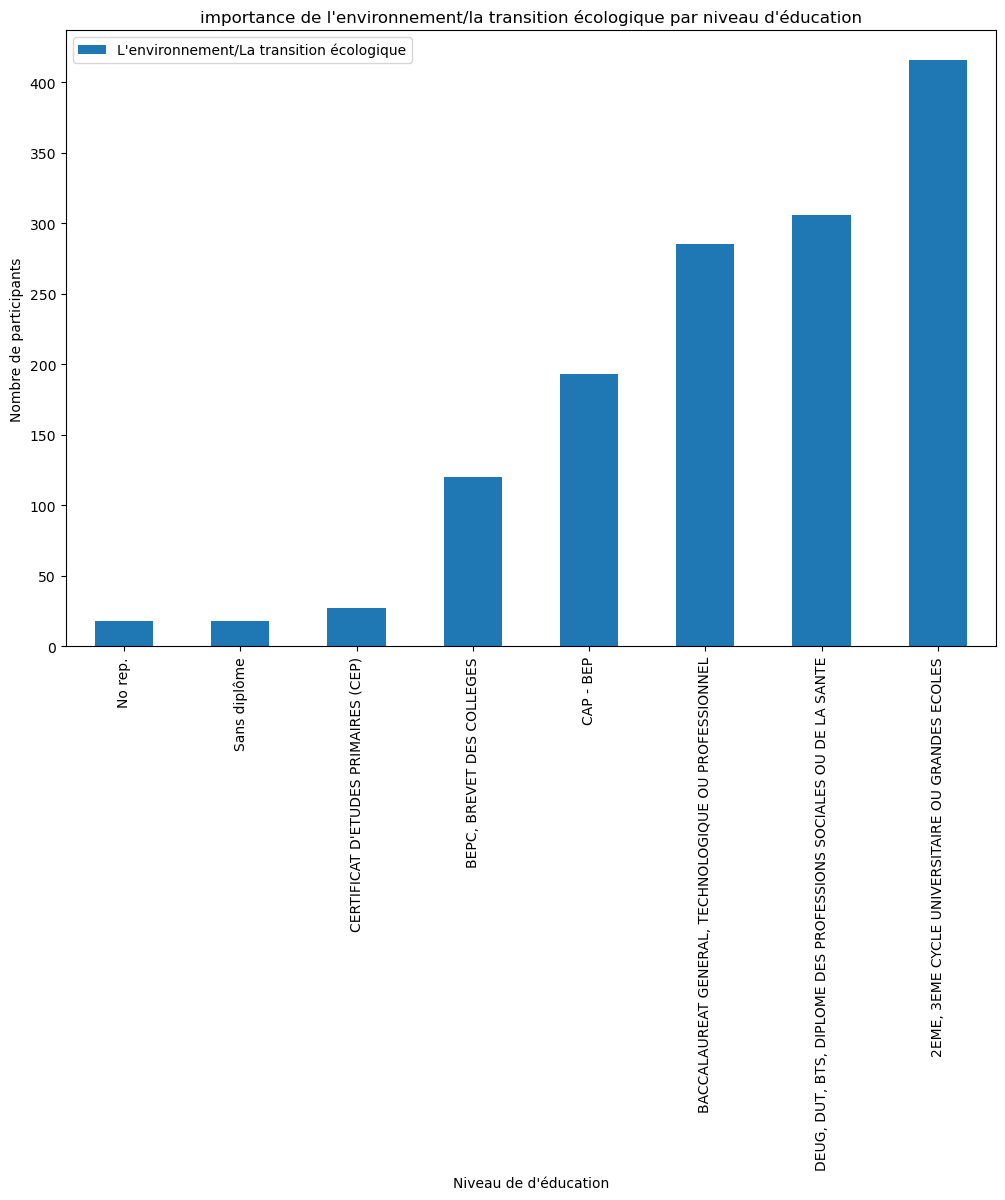

In [292]:
#trier les valeurs 
df_diplome=df_diplome.sort_values(by="L'environnement/La transition écologique")

#créer un diagramme en barre 
df_diplome["L'environnement/La transition écologique"].plot(kind='bar', stacked=True, figsize=(12,8))
plt.title("importance de l'environnement/la transition écologique par niveau d'éducation")
plt.xlabel("Niveau de d'éducation")
plt.ylabel("Nombre de participants")
plt.legend(loc="best")
plt.show()

In [294]:
#affinage du data4 pour se focaliser sur les activités 
te =data4.loc[:,'q18_i1. Causes GES activités industrielles':'q18_i11. Causes GES numérique']
te.tail(5)

,q18_i1. Causes GES activités industrielles,q18_i2. Causes GES transports,q18_i3. Causes GES bâtiments,q18_i4. Causes GES agriculture,"q18_i5. Causes GES centrales de production d'électricité au gaz, charbon ou fuel",q18_i6. Causes GES traitement des déchets,q18_i7. Causes GES destruction des forêts,q18_i8. Causes GES centrales nucléaires,q18_i9. Causes GES activité volcanique,q18_i10. Causes GES bombes aérosols,q18_i11. Causes GES numérique
Vague,,,,,,,,,,,
Vague 23,Beaucoup,Beaucoup,Beaucoup,Assez,Beaucoup,Beaucoup,Beaucoup,Assez,Beaucoup,Beaucoup,Beaucoup
Vague 23,Beaucoup,Beaucoup,Assez,Pas du tout,Assez,Beaucoup,Pas du tout,Peu,Peu,Assez,Beaucoup
Vague 23,Beaucoup,Beaucoup,Beaucoup,Beaucoup,Beaucoup,Assez,Assez,Peu,Assez,Assez,Beaucoup
Vague 23,Beaucoup,Peu,Assez,Peu,Beaucoup,Assez,Beaucoup,Beaucoup,No rep.,Assez,Beaucoup
Vague 23,Beaucoup,Assez,Peu,Peu,Beaucoup,Peu,Beaucoup,Peu,Beaucoup,Peu,Beaucoup


In [295]:
#création dataframe
GES= te.apply(pd.Series.value_counts)
GES.head(5)

,q18_i1. Causes GES activités industrielles,q18_i2. Causes GES transports,q18_i3. Causes GES bâtiments,q18_i4. Causes GES agriculture,"q18_i5. Causes GES centrales de production d'électricité au gaz, charbon ou fuel",q18_i6. Causes GES traitement des déchets,q18_i7. Causes GES destruction des forêts,q18_i8. Causes GES centrales nucléaires,q18_i9. Causes GES activité volcanique,q18_i10. Causes GES bombes aérosols,q18_i11. Causes GES numérique
Assez,6430,8668,11842,10154,8521,11410,5981,6235,7368,9095,1982
Beaucoup,18999,15947,8246,6619,12190,8730,18480,9738,4228,11950,1780
No rep.,674,598,1053,930,1507,1072,688,1191,2132,990,70
Pas du tout,371,381,1086,2697,1312,1069,865,3633,3559,1122,114
Peu,1394,2274,5641,7468,4338,5587,1854,7071,10581,4711,699


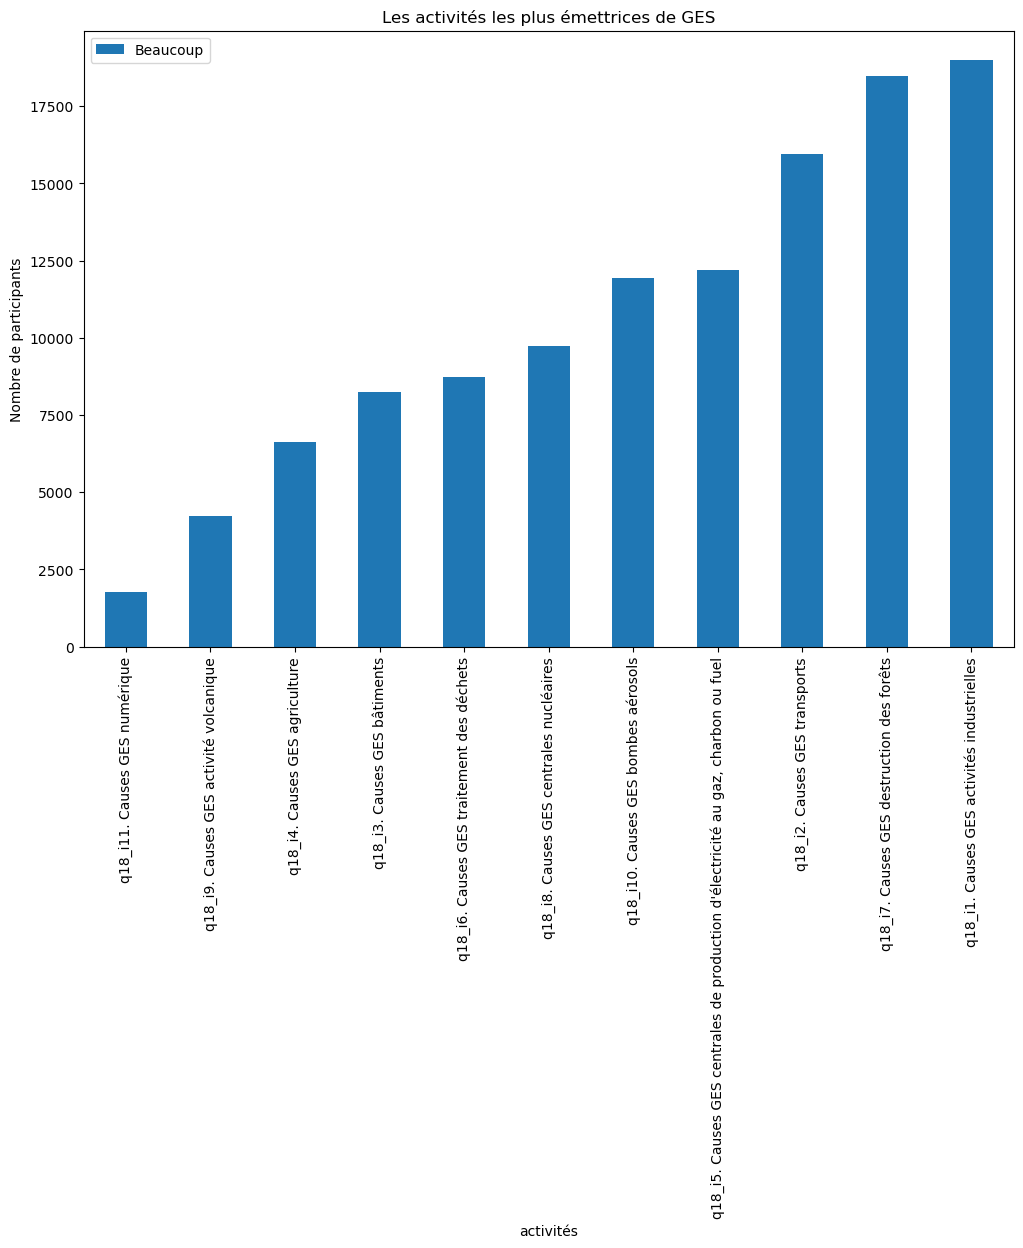

In [296]:
#tri des données 

GES_sort=pd.DataFrame(GES.iloc[1,:].sort_values(ascending=True))

#créer diagramme
GES_sort.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title("Les activités les plus émettrices de GES")
plt.xlabel("activités")
plt.ylabel("Nombre de participants")
plt.legend(loc="best")
plt.show()

In [297]:
#affinage du data4 pour se focaliser sur les actions prises par les participants 
action_prise =data4.loc[:,'q20_i1. Action individuelle Tri déchets':'q20_i16. Action individuelle Choisir pour mon épargne une banque et/ou des placements financiers qui respectent ...']
action_prise.tail(10)

,q20_i1. Action individuelle Tri déchets,q20_i2. Actin individuelle Eteindre appareils en veille,q20_i3. Actin individuelle Transports en commun,q20_i4. Actin individuelle Baisse température logement,q20_i5. Actin individuelle Acheter légumes de saison,q20_i6. Actin individuelle Limiter consommation viande,q20_i7. Actin individuelle Se déplacer en vélo ou à pied,q20_i8. Actin individuelle Covoiturage ou de l'auto-partage,q20_i9. Actin individuelle Produits avec peu d'emballage,q20_i10. Action individuelle choix Ecolabels,q20_i11. Action individuelle Consommer moins,"q20_i12. Action individuelle Couper chauffage, chauffe-eau",q20_i13. Action individuelle Pas prendre l'avion pour ses loisirs,q20_i14. Action individuelle Produits locaux,q20_i15. Action individuelle Achats vêtements seconde main,q20_i16. Action individuelle Choisir pour mon épargne une banque et/ou des placements financiers qui respectent ...
Vague,,,,,,,,,,,,,,,,
Vague 23,...vous le faites déjà,...vous le faites déjà,...vous pourriez le faire assez facilement,...vous le faites déjà,...vous pourriez le faire assez facilement,...vous pourriez le faire assez facilement,...vous le faites déjà,...vous pourriez le faire assez facilement,...vous le faites déjà,...vous pourriez le faire assez facilement,...vous pourriez le faire assez facilement,...vous le faites déjà,...vous le faites déjà,...vous pourriez le faire assez facilement,...vous pourriez le faire assez facilement,...vous pourriez le faire assez facilement
Vague 23,...vous le faites déjà,...vous le faites déjà,...vous ne pouvez pas le faire,...vous le faites déjà,...vous le faites déjà,...vous le faites déjà,...vous le faites déjà,...vous ne pouvez pas le faire,...vous pourriez le faire assez facilement,...vous le faites déjà,...vous le faites déjà,...vous le faites déjà,...vous ne pouvez pas le faire,...vous le faites déjà,...vous pourriez le faire mais difficilement,...vous pourriez le faire assez facilement
Vague 23,...vous le faites déjà,...vous pourriez le faire mais difficilement,...vous ne pouvez pas le faire,...vous pourriez le faire assez facilement,...vous le faites déjà,...vous le faites déjà,...vous le faites déjà,...vous pourriez le faire mais difficilement,...vous pourriez le faire assez facilement,...vous pourriez le faire assez facilement,...vous le faites déjà,...vous pourriez le faire assez facilement,...vous le faites déjà,...vous le faites déjà,...vous pourriez le faire mais difficilement,...vous le faites déjà
Vague 23,...vous le faites déjà,...vous le faites déjà,...vous ne pouvez pas le faire,...vous le faites déjà,...vous le faites déjà,...vous ne pouvez pas le faire,...vous pourriez le faire mais difficilement,...vous ne pouvez pas le faire,...vous pourriez le faire mais difficilement,...vous pourriez le faire mais difficilement,...vous pourriez le faire mais difficilement,...vous le faites déjà,...vous pourriez le faire mais difficilement,...vous pourriez le faire mais difficilement,...vous pourriez le faire mais difficilement,...vous pourriez le faire mais difficilement
Vague 23,...vous le faites déjà,...vous le faites déjà,...vous pourriez le faire mais difficilement,...vous le faites déjà,...vous le faites déjà,...vous le faites déjà,...vous pourriez le faire assez facilement,...vous pourriez le faire assez facilement,...vous le faites déjà,...vous le faites déjà,...vous le faites déjà,...vous le faites déjà,...vous le faites déjà,...vous le faites déjà,...vous le faites déjà,...vous pourriez le faire assez facilement
Vague 23,...vous pourriez le faire assez facilement,...vous le faites déjà,...vous pourriez le faire mais difficilement,...vous le faites déjà,...vous le faites déjà,...vous le faites déjà,...vous pourriez le faire mais difficilement,...vous le faites déjà,...vous le faites déjà,...vous le faites déjà,...vous le faites déjà,...vous le faites déjà,...vous le faites déjà,...vous le faites déjà,...vous le faites déjà,...vous pourriez le faire assez facilement
Vague 23,..

In [298]:
#création dataframe
dfq20_count= action_prise.apply(pd.Series.value_counts)
dfq20_count.head(5)

,q20_i1. Action individuelle Tri déchets,q20_i2. Actin individuelle Eteindre appareils en veille,q20_i3. Actin individuelle Transports en commun,q20_i4. Actin individuelle Baisse température logement,q20_i5. Actin individuelle Acheter légumes de saison,q20_i6. Actin individuelle Limiter consommation viande,q20_i7. Actin individuelle Se déplacer en vélo ou à pied,q20_i8. Actin individuelle Covoiturage ou de l'auto-partage,q20_i9. Actin individuelle Produits avec peu d'emballage,q20_i10. Action individuelle choix Ecolabels,q20_i11. Action individuelle Consommer moins,"q20_i12. Action individuelle Couper chauffage, chauffe-eau",q20_i13. Action individuelle Pas prendre l'avion pour ses loisirs,q20_i14. Action individuelle Produits locaux,q20_i15. Action individuelle Achats vêtements seconde main,q20_i16. Action individuelle Choisir pour mon épargne une banque et/ou des placements financiers qui respectent ...
...vous le faites déjà,16865,12302,6705,10996,12347,8519,5761,3219,7134,3470,3978,5996,2970,2894,690,316
...vous ne pouvez pas le faire,320,437,5057,1577,442,1466,4379,4421,691,357,338,294,912,176,431,185
...vous pourriez le faire assez facilement,2300,5867,3690,4541,4632,5314,4087,4492,6969,4578,2867,1618,1620,1649,646,701
...vous pourriez le faire mais difficilement,738,1611,4489,2858,1272,3376,4445,4405,1876,1333,1148,423,1226,649,559,289
No rep.,1849,1855,2131,2100,362,380,383,510,377,251,157,157,260,63,25,84


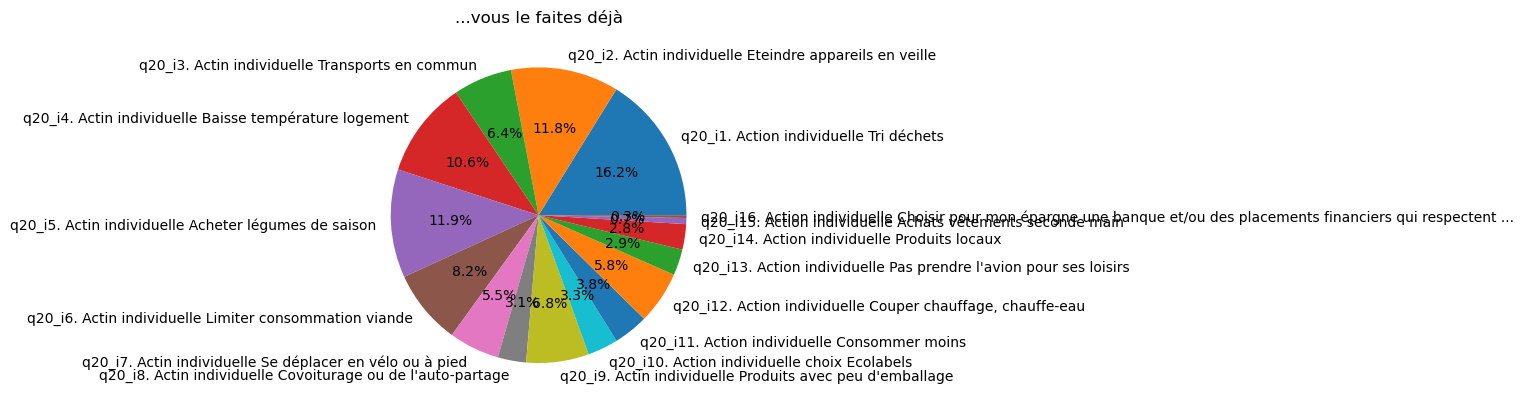

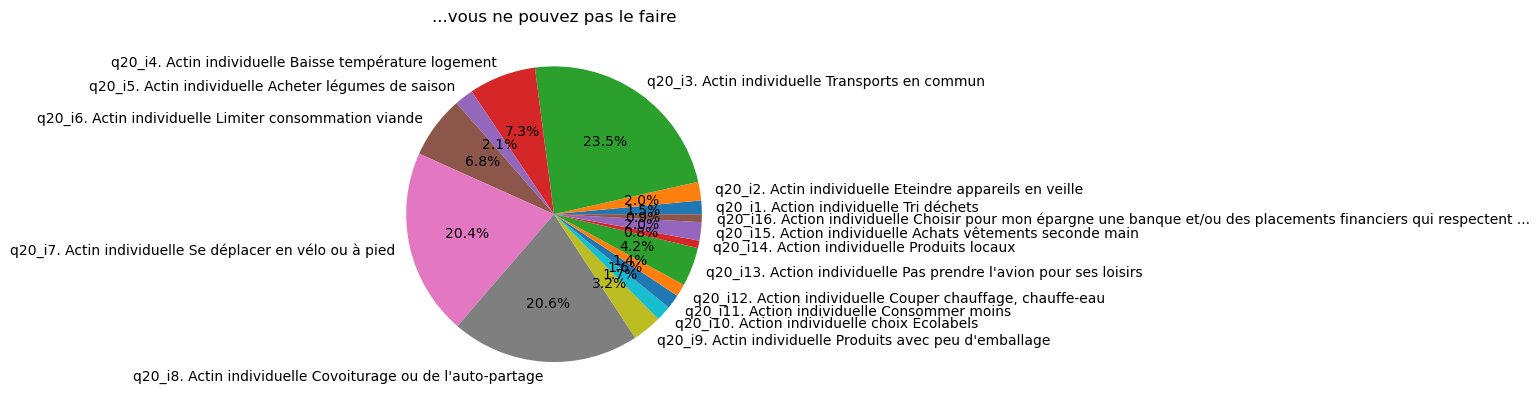

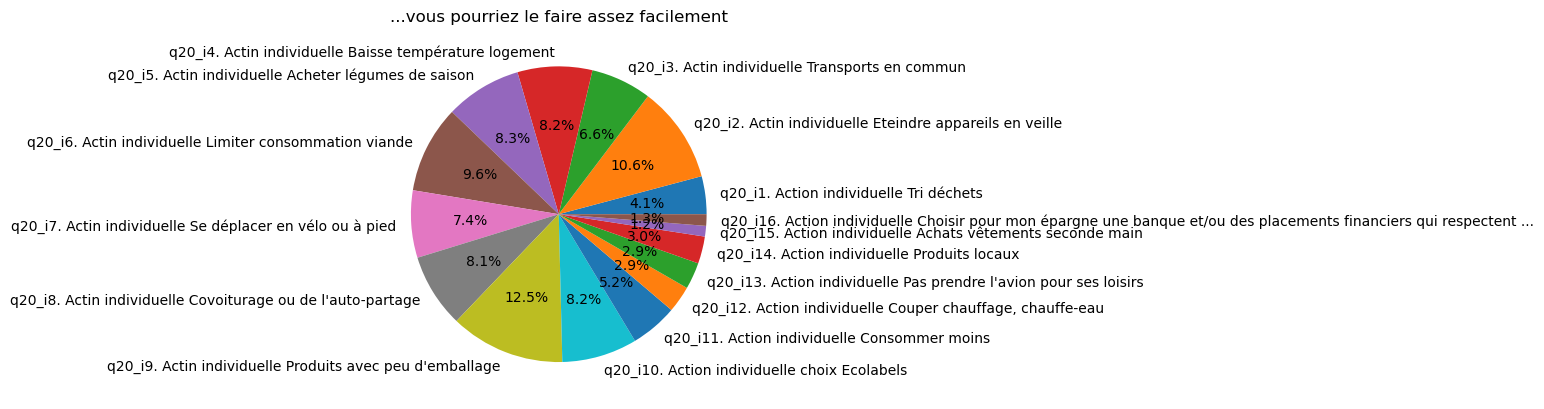

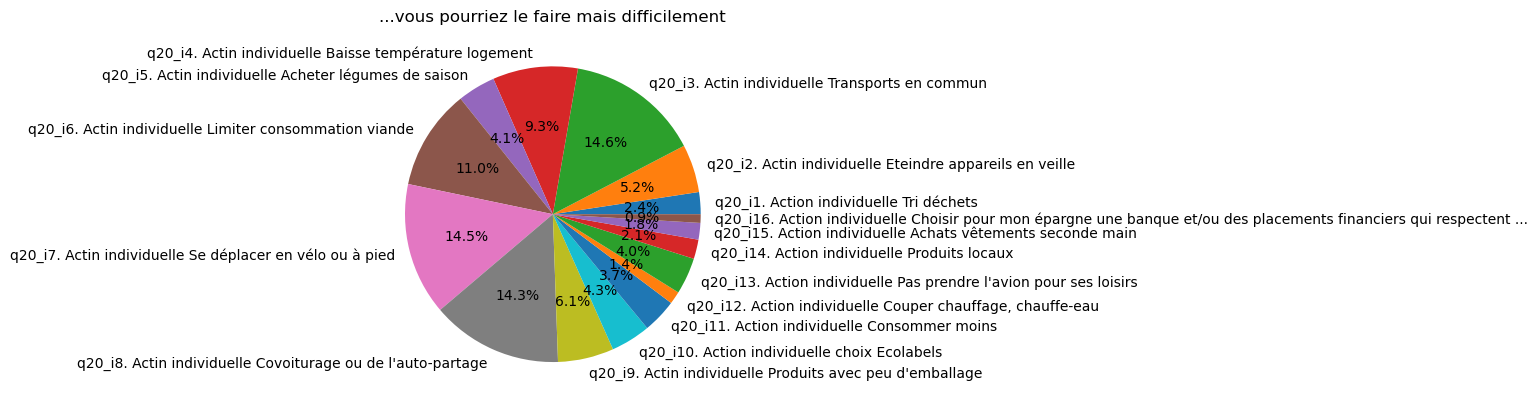

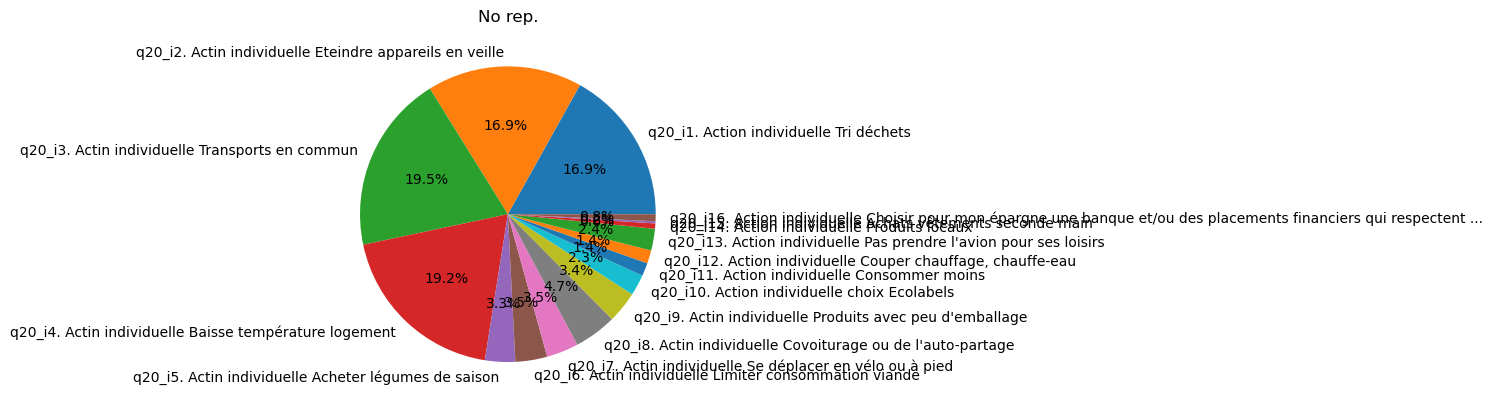

In [299]:
#créer diagramme
for index in dfq20_count.index : 
    val= dfq20_count.loc[index].values
    plt.pie(val, labels=dfq20_count.columns, autopct='%1.1f%%')
    plt.title(index)
    
    # Affichez le graphique
    plt.show()

In [300]:
#affinage du data4 pour se focaliser sur les actions souhaitées par les participants 
action_souhaite =data4.loc[:,'q21_i1. Mesures Baisse vitesse autoroute':'q21_i14. Mesures Interdire publicité']
action_souhaite.tail(10)

,q21_i1. Mesures Baisse vitesse autoroute,q21_i2. Mesures Taxe transport aérien,q21_i3. Mesures Obligation rénovation,q21_i4. Mesures Compteurs communicants,q21_i5. Mesures Prix acheminement produits,q21_i6. Mesures Taxe carbone,q21_i7. Mesures EnR,q21_i8. Mesures Densifier les villes,q21_i9. Mesures Taxe véhicules émetteurs,q21_i10. Mesures Favoriser véhicules peu polluants,q21_i11. Mesures Menu restauration collective,q21_i12. Mesures Réduire gaspillage alimentaireé,q21_i13. Mesures Supprimer dates de péremption,q21_i14. Mesures Interdire publicité
Vague,,,,,,,,,,,,,,
Vague 23,Assez souhaitable,Très souhaitable,Très souhaitable,Très souhaitable,Assez souhaitable,Très souhaitable,Assez souhaitable,Assez souhaitable,Très souhaitable,Assez souhaitable,Assez souhaitable,NaN,Très souhaitable,Très souhaitable
Vague 23,Pas du tout souhaitable,Pas vraiment souhaitable,Assez souhaitable,Très souhaitable,Assez souhaitable,Pas vraiment souhaitable,Très souhaitable,Pas vraiment souhaitable,Très souhaitable,Pas vraiment souhaitable,Assez souhaitable,NaN,Très souhaitable,Très souhaitable
Vague 23,Pas du tout souhaitable,Très souhaitable,Assez souhaitable,Très souhaitable,Pas vraiment souhaitable,Pas vraiment souhaitable,Assez souhaitable,Pas du tout souhaitable,Pas du tout souhaitable,Assez souhaitable,Pas vraiment souhaitable,NaN,Assez souhaitable,Assez souhaitable
Vague 23,Pas du tout souhaitable,Pas du tout souhaitable,Pas du tout souhaitable,Assez souhaitable,Pas du tout souhaitable,Pas du tout souhaitable,Pas du tout souhaitable,Pas du tout souhaitable,Pas du tout souhaitable,Pas du tout souhaitable,Pas du tout souhaitable,NaN,Assez souhaitable,Pas du tout souhaitable
Vague 23,Pas vraiment souhaitable,Assez souhaitable,Pas vraiment souhaitable,Assez souhaitable,Assez souhaitable,Assez souhaitable,Assez souhaitable,Assez souhaitable,Assez souhaitable,Assez souhaitable,Assez souhaitable,NaN,Très souhaitable,Assez souhaitable
Vague 23,Assez souhaitable,Très souhaitable,Pas vraiment souhaitable,Assez souhaitable,Très souhaitable,Pas vraiment souhaitable,Assez souhaitable,Assez souhaitable,Pas vraiment souhaitable,Très souhaitable,Assez souhaitable,NaN,Assez souhaitable,Assez souhaitable
Vague 23,Assez souhaitable,Pas vraiment souhaitable,Très souhaitable,Très souhaitable,Pas du tout souhaitable,Pas vraiment souhaitable,Très souhaitable,Pas vraiment souhaitable,Très souhaitable,Très souhaitable,Assez souhaitable,NaN,Très souhaitable,Très souhaitable
Vague 23,Assez souhaitable,Très souhaitable,Assez souhaitable,Assez souhaitable,Très souhaitable,Assez souhaitable,Très souhaitable,Très souhaitable,Très souhaitable,Assez souhaitable,No rep.,NaN,Pas vraiment souhaitable,Très souhaitable
Vague 23,Très souhaitable,Pas vraiment souhaitable,Très souhaitable,Assez souhaitable,Très souhaitable,Très souhaitable,Très souhaitable,Pas vraiment souhaitable,Très souhaitable,Très souhaitable,Très souhaitable,NaN,Très souhaitable,Très souhaitable


In [301]:
#création dataframe
dfq21_count= action_souhaite.apply(pd.Series.value_counts)
dfq21_count.head(5)

,q21_i1. Mesures Baisse vitesse autoroute,q21_i2. Mesures Taxe transport aérien,q21_i3. Mesures Obligation rénovation,q21_i4. Mesures Compteurs communicants,q21_i5. Mesures Prix acheminement produits,q21_i6. Mesures Taxe carbone,q21_i7. Mesures EnR,q21_i8. Mesures Densifier les villes,q21_i9. Mesures Taxe véhicules émetteurs,q21_i10. Mesures Favoriser véhicules peu polluants,q21_i11. Mesures Menu restauration collective,q21_i12. Mesures Réduire gaspillage alimentaireé,q21_i13. Mesures Supprimer dates de péremption,q21_i14. Mesures Interdire publicité
Assez souhaitable,4712,5825,7151,7052,6306,4465,6207,3417,5079,4840,4489,2879,501,604
No rep.,407,455,406,924,904,423,347,396,3390,258,240,208,13,19
Pas du tout souhaitable,4895,2151,1733,1676,2309,2585,554,3456,1545,853,1241,138,65,67
Pas vraiment souhaitable,4930,4846,3264,2595,3875,4063,1550,5070,3009,2038,2031,355,207,196
Très souhaitable,2887,4554,5277,5584,4437,2286,5164,1483,3805,2784,2772,5618,789,689


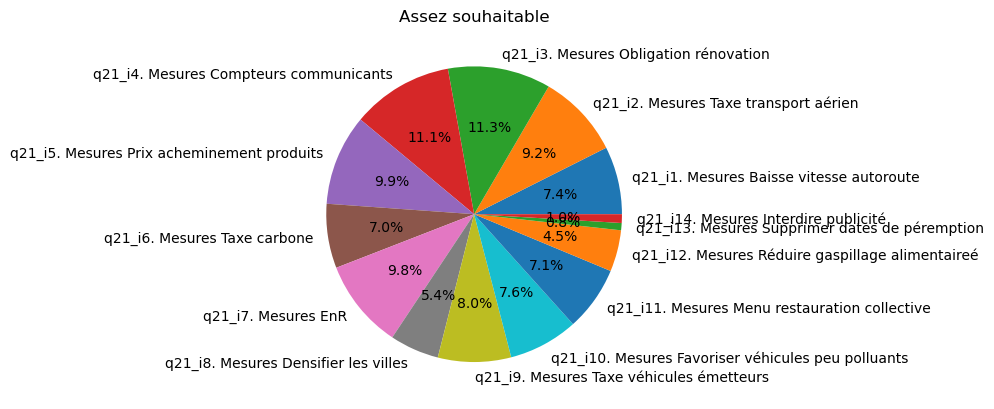

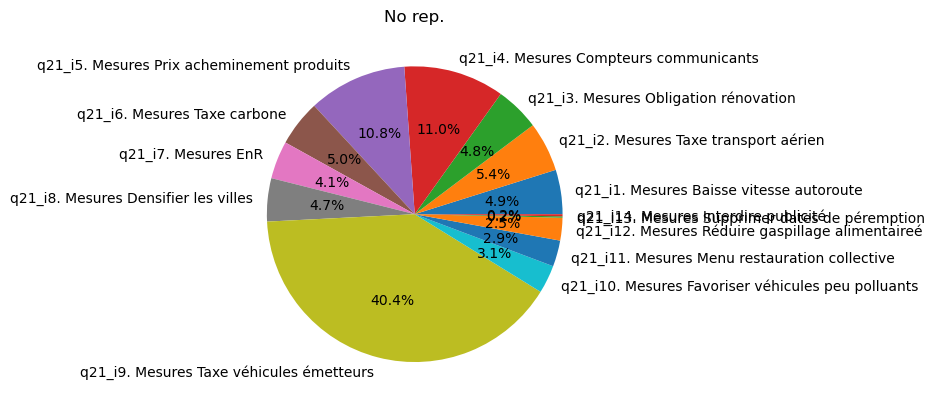

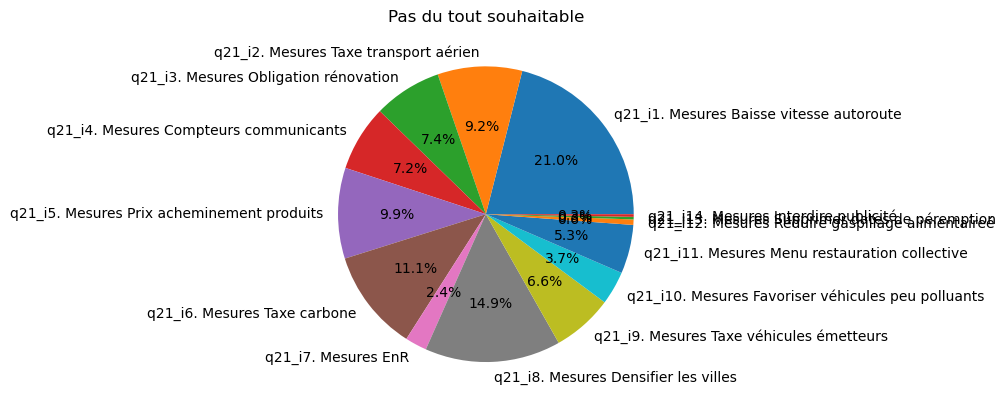

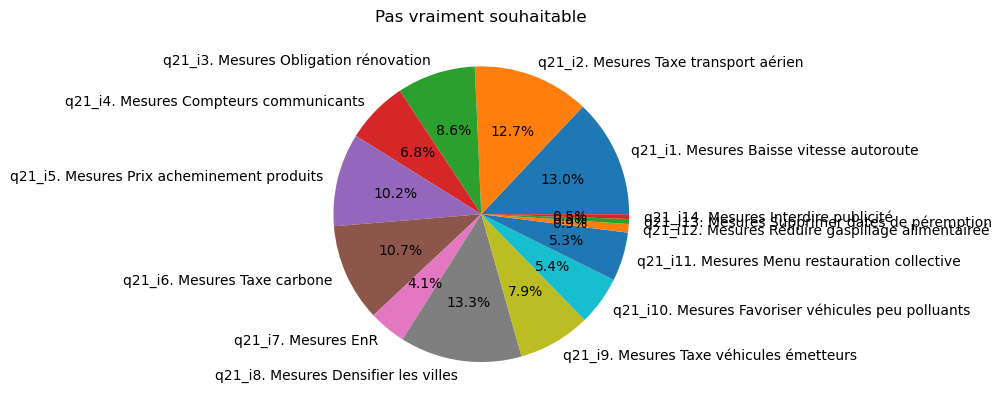

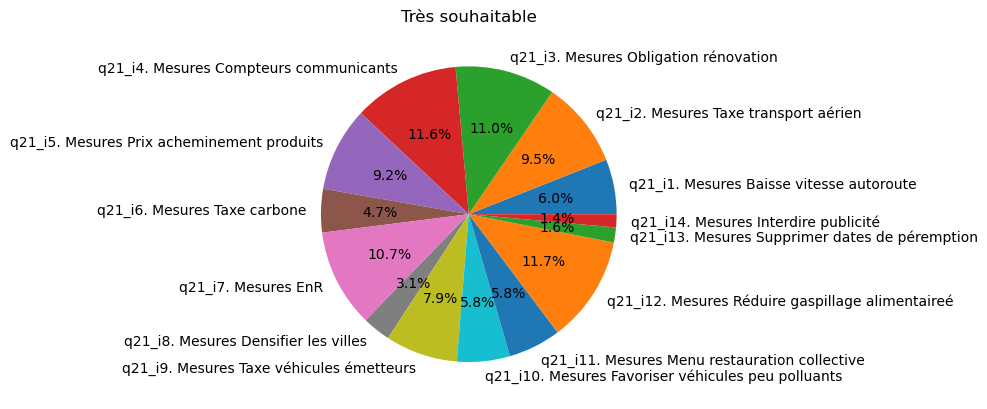

In [302]:
#créer diagramme
for index in dfq21_count.index : 
    val= dfq21_count.loc[index].values
    plt.pie(val, labels=dfq21_count.columns, autopct='%1.1f%%')
    plt.title(index)
    
    # Affichez le graphique
    plt.show()

In [303]:
#maj du dfq21_count en ajoutant la variable revenus 
x= data4.loc[:,['s20. Revenus',"q21_i2. Mesures Taxe transport aérien","q21_i3. Mesures Obligation rénovation","q21_i4. Mesures Compteurs communicants","q21_i5. Mesures Prix acheminement produits","q21_i6. Mesures Taxe carbone","q21_i7. Mesures EnR","q21_i8. Mesures Densifier les villes","q21_i9. Mesures Taxe véhicules émetteurs","q21_i10. Mesures Favoriser véhicules peu polluants","q21_i11. Mesures Menu restauration collective","q21_i12. Mesures Réduire gaspillage alimentaireé","q21_i13. Mesures Supprimer dates de péremption","q21_i14. Mesures Interdire publicité"]]
x.tail(20)

,s20. Revenus,q21_i2. Mesures Taxe transport aérien,q21_i3. Mesures Obligation rénovation,q21_i4. Mesures Compteurs communicants,q21_i5. Mesures Prix acheminement produits,q21_i6. Mesures Taxe carbone,q21_i7. Mesures EnR,q21_i8. Mesures Densifier les villes,q21_i9. Mesures Taxe véhicules émetteurs,q21_i10. Mesures Favoriser véhicules peu polluants,q21_i11. Mesures Menu restauration collective,q21_i12. Mesures Réduire gaspillage alimentaireé,q21_i13. Mesures Supprimer dates de péremption,q21_i14. Mesures Interdire publicité
Vague,,,,,,,,,,,,,,
Vague 23,De 3 000 à 3 499 Euros par mois,Pas vraiment souhaitable,Assez souhaitable,Pas vraiment souhaitable,Pas vraiment souhaitable,Assez souhaitable,Très souhaitable,Pas du tout souhaitable,Assez souhaitable,Assez souhaitable,Assez souhaitable,NaN,Très souhaitable,Pas vraiment souhaitable
Vague 23,De 2 000 à 2 999 Euros par mois,Assez souhaitable,Assez souhaitable,Assez souhaitable,Assez souhaitable,Très souhaitable,Assez souhaitable,Pas du tout souhaitable,Très souhaitable,Assez souhaitable,Assez souhaitable,NaN,Pas vraiment souhaitable,Très souhaitable
Vague 23,De 2 000 à 2 999 Euros par mois,Assez souhaitable,Très souhaitable,Assez souhaitable,Assez souhaitable,Assez souhaitable,Très souhaitable,Assez souhaitable,Assez souhaitable,Assez souhaitable,Assez souhaitable,NaN,Très souhaitable,Très souhaitable
Vague 23,De 3 500 à 4 999 Euros par mois,Assez souhaitable,Assez souhaitable,Assez souhaitable,Pas du tout souhaitable,Pas vraiment souhaitable,Très souhaitable,Pas du tout souhaitable,Pas vraiment souhaitable,Pas vraiment souhaitable,Pas vraiment souhaitable,NaN,Très souhaitable,Assez souhaitable
Vague 23,De 1 000 à 1 499 Euros par mois,Très souhaitable,Très souhaitable,Pas du tout souhaitable,Pas du tout souhaitable,Pas du tout souhaitable,Pas du tout souhaitable,Pas du tout souhaitable,Très souhaitable,Pas du tout souhaitable,Pas du tout souhaitable,NaN,Pas du tout souhaitable,Pas du tout souhaitable
Vague 23,De 2 000 à 2 999 Euros par mois,Très souhaitable,Très souhaitable,Très souhaitable,Très souhaitable,Assez souhaitable,Très souhaitable,Pas vraiment souhaitable,Assez souhaitable,Assez souhaitable,Assez souhaitable,NaN,Très souhaitable,Très souhaitable
Vague 23,De 3 500 à 4 999 Euros par mois,Pas vraiment souhaitable,Très souhaitable,Assez souhaitable,Assez souhaitable,Pas vraiment souhaitable,Assez souhaitable,Assez souhaitable,Pas vraiment souhaitable,Assez souhaitable,Très souhaitable,NaN,Très souhaitable,Très souhaitable
Vague 23,De 1 000 à 1 499 Euros par mois,Très souhaitable,Assez souhaitable,No rep.,Assez souhaitable,Pas vraiment souhaitable,Très souhaitable,Pas vraiment souhaitable,Pas vraiment souhaitable,Pas vraiment souhaitable,Très souhaitable,NaN,Très souhaitable,Très souhaitable
Vague 23,Je ne sais pas,Pas du tout souhaitable,Très souhaitable,Pas vraiment souhaitable,Très souhaitable,Pas du tout souhaitable,Très souhaitable,Très souhaitable,Pas du tout souhaitable,No rep.,No rep.,NaN,Pas du tout souhaitable,Très souhaitable


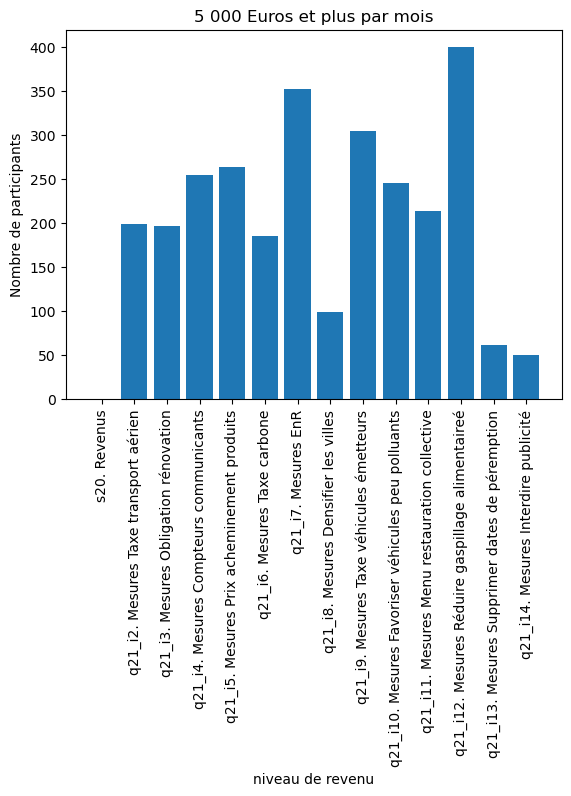

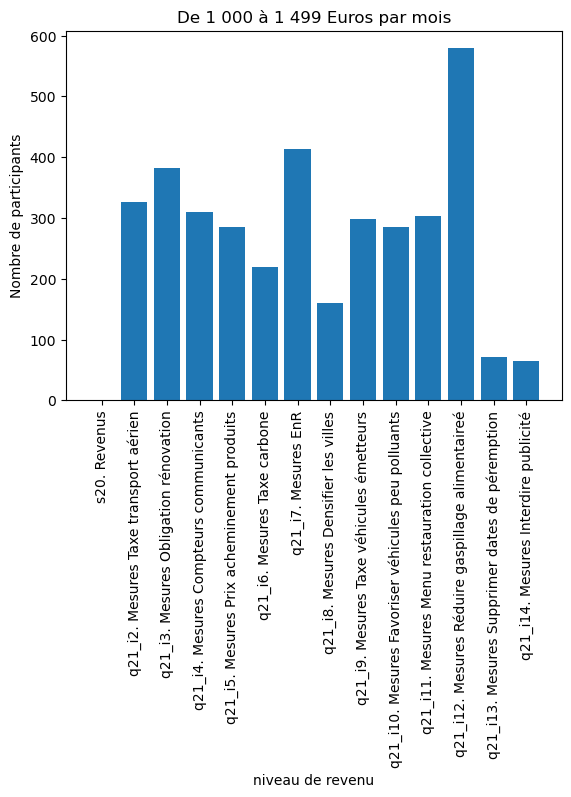

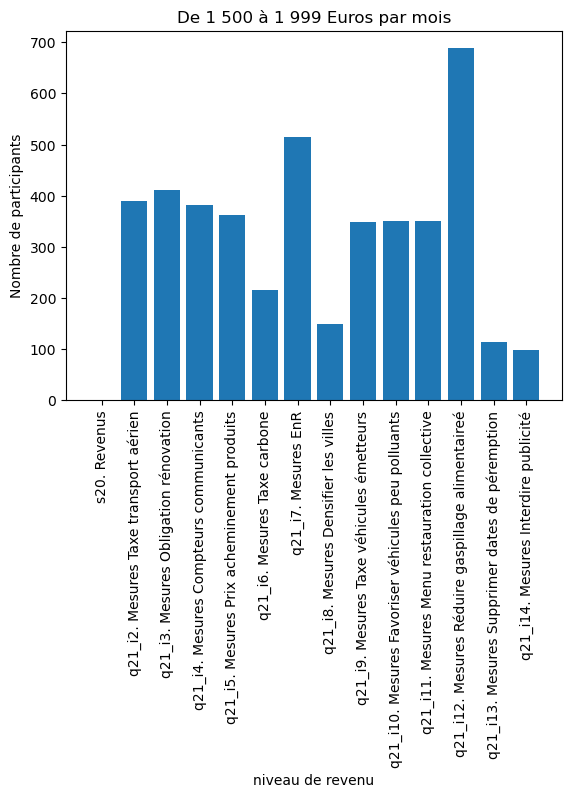

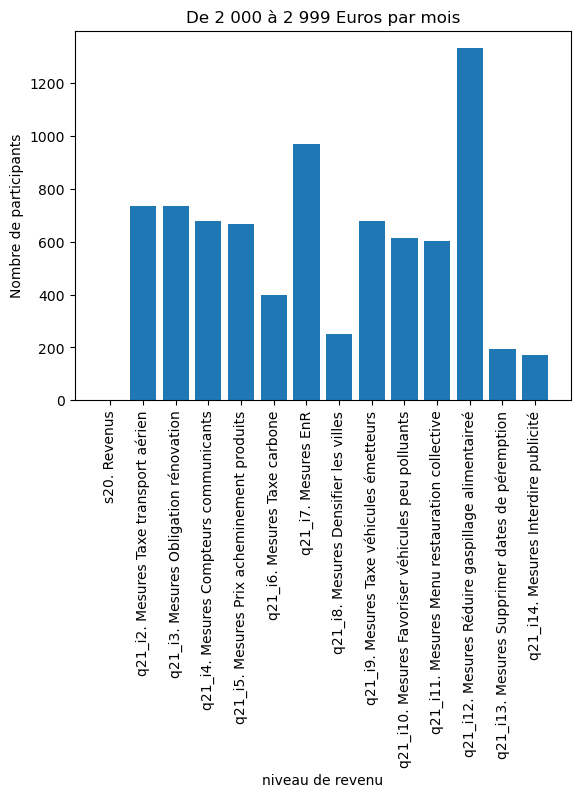

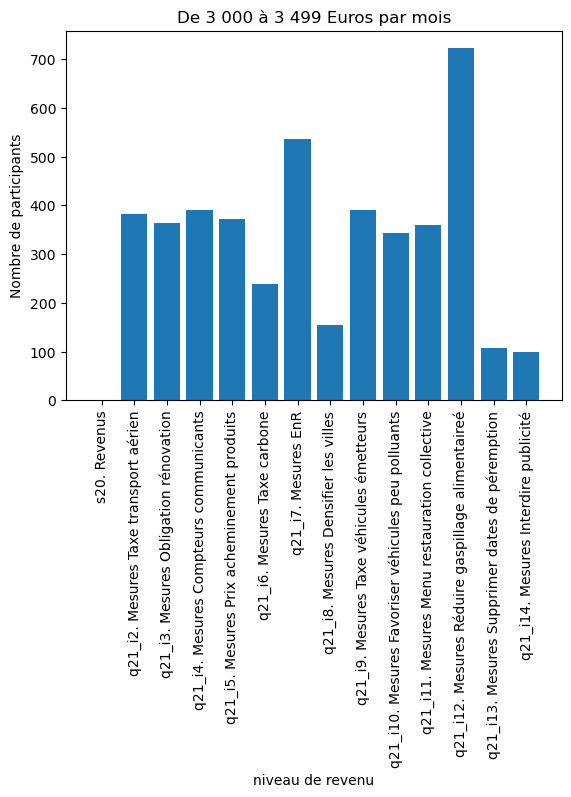

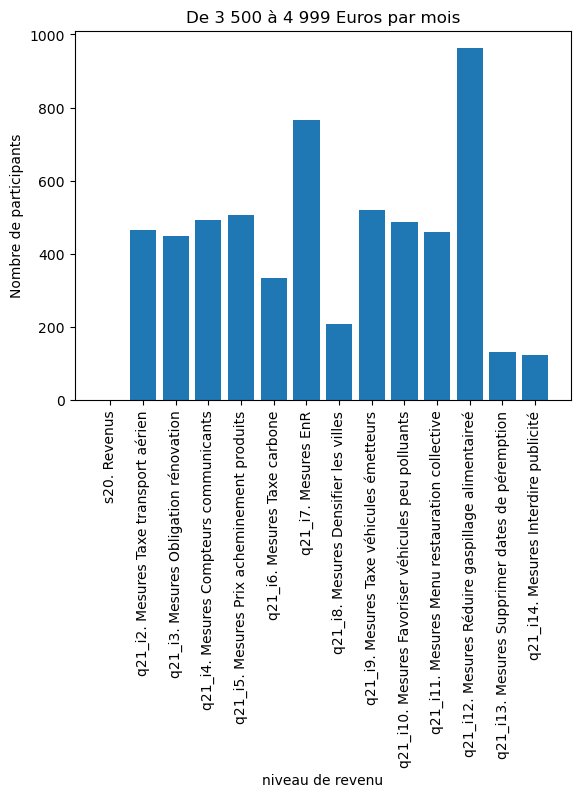

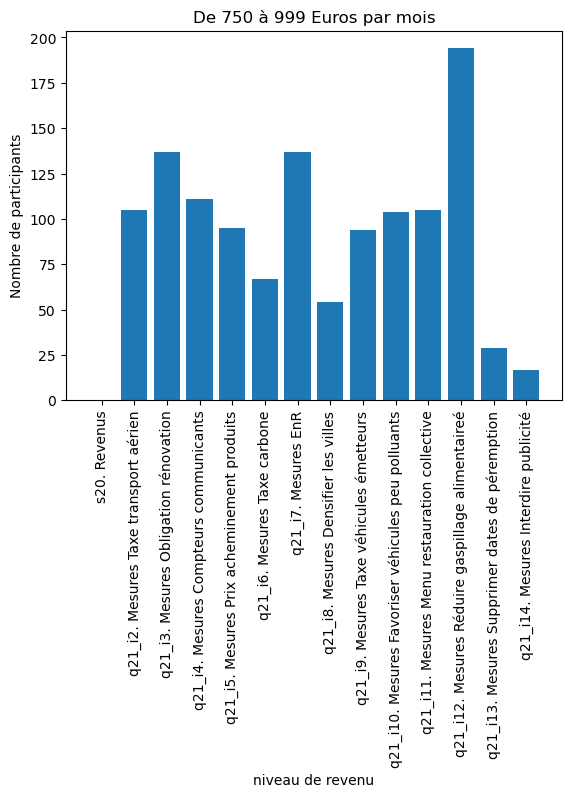

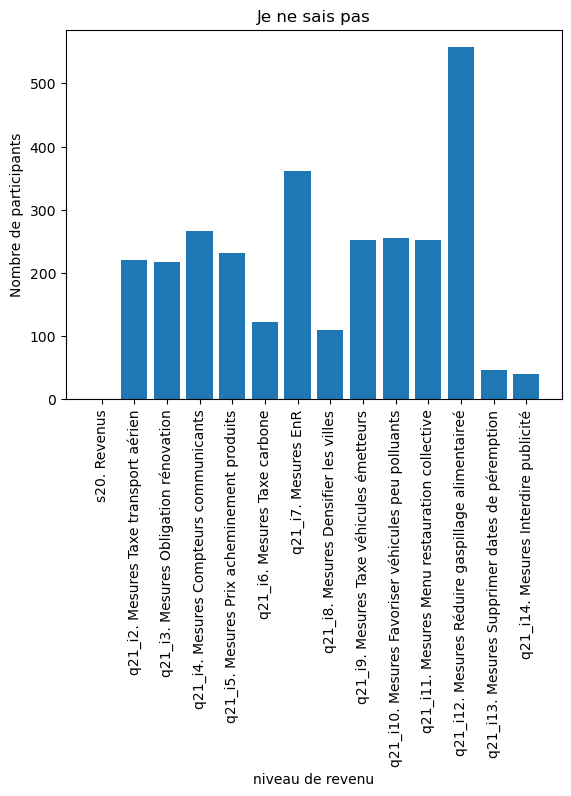

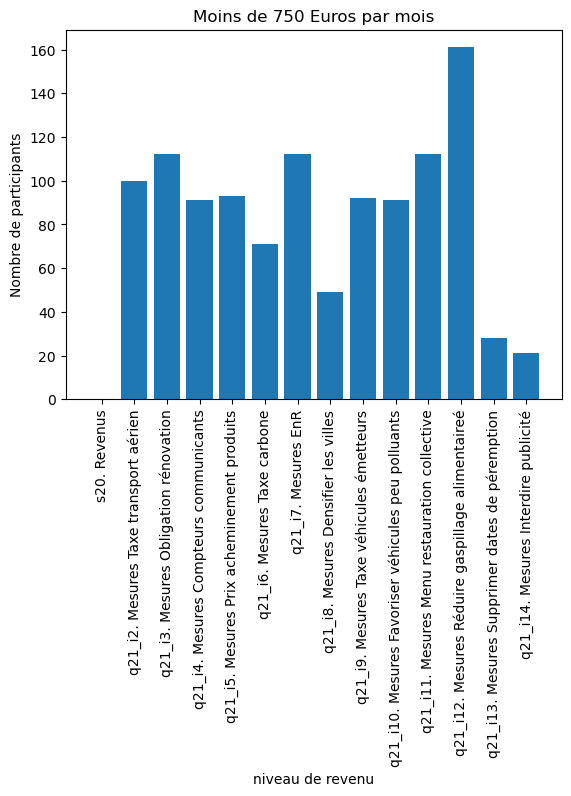

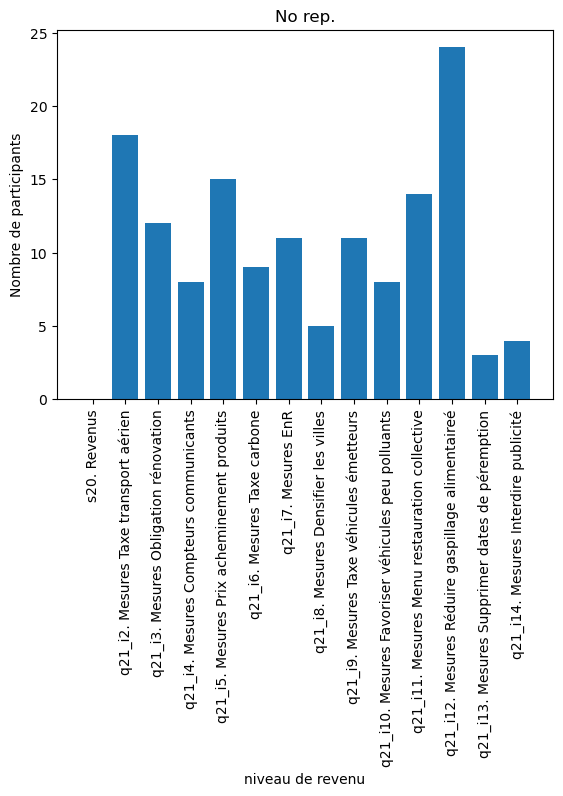

In [305]:
#je groupe par niv de revenus 
q21revenus_group=x.groupby('s20. Revenus')

results_dict = {}
counts_dict = {}

for group, df in q21revenus_group:
    for col in df.columns:
        counts = df[col].value_counts()
        counts_dict[col] = counts.get('Très souhaitable', 0)
    results_dict[group] = counts_dict.copy()
    counts_dict.clear()

# je créer des diag pour chaque groupe
for income_group, counts in results_dict.items():
    plt.bar(counts.keys(), counts.values())
    plt.title(income_group)
    plt.xlabel("niveau de revenu")
    plt.xticks(rotation=90)
    plt.ylabel("Nombre de participants")
    plt.show()

# tests stats 

In [306]:
#créer une colonne importance environnement/ecolo avec modalité priorité et non priorité 
importance_env = []

for val in data4['q1_1. Enjeu important 1']:
    if val == "L'environnement/La transition écologique":
        importance_env.append(1)
    else:
        importance_env.append(0)

data4['importance_environnement'] = importance_env

In [307]:
#affiner le data4 sur les variables situation sociales
df_ss= data4.loc[:, ['S2. âge','S3. Zone géo','importance_environnement', 's20. Revenus', 'S5. CSP','s24. Echiquier politique','s13. Nb membres foyer','s15. Diplôme']]
df_ss.head(5)

,S2. âge,S3. Zone géo,importance_environnement,s20. Revenus,S5. CSP,s24. Echiquier politique,s13. Nb membres foyer,s15. Diplôme
Vague,,,,,,,,
Vague 01,65 ans et +,Nord Est,0,NaN,NaN,NaN,2 personnes,"2EME, 3EME CYCLE UNIVERSITAIRE OU GRANDES ECOLES"
Vague 01,35-49 ans,Nord Est,0,NaN,NaN,NaN,4 personnes et +,CAP - BEP
Vague 01,25-34 ans,Ile de France,0,NaN,NaN,NaN,4 personnes et +,CAP - BEP
Vague 01,35-49 ans,Ile de France,0,NaN,NaN,NaN,4 personnes et +,"2EME, 3EME CYCLE UNIVERSITAIRE OU GRANDES ECOLES"
Vague 01,15-17 ans,Sud Ouest,0,NaN,NaN,NaN,4 personnes et +,No rep.


In [308]:
contingences15 = pd.crosstab(data4['importance_environnement'], data4['s15. Diplôme'])
df_contingences15= pd.DataFrame(contingences15)
df_contingences15= df_contingences15.T
df_contingences15.head(10)

importance_environnement,0,1
s15. Diplôme,,
"2EME, 3EME CYCLE UNIVERSITAIRE OU GRANDES ECOLES",5234,416
"BACCALAUREAT GENERAL, TECHNOLOGIQUE OU PROFESSIONNEL",5894,285
"BEPC, BREVET DES COLLEGES",2422,120
CAP - BEP,5206,193
CERTIFICAT D'ETUDES PRIMAIRES (CEP),1590,27
"DEUG, DUT, BTS, DIPLOME DES PROFESSIONS SOCIALES OU DE LA SANTE",4750,306
No rep.,1132,18
Sans diplôme,257,18


In [309]:
from scipy.stats import chi2_contingency
# Effectuer le test du chi-carré
stat, p, dof, expected = chi2_contingency(df_contingences15)

# Afficher les résultats
print("Valeur de test du chi-carré :", stat)
print("Valeur-p :", p)
print("Degrés de liberté :", dof)
print("Fréquences attendues :", expected)

Valeur de test du chi-carré : 172.49252673233357
Valeur-p : 7.483796793330129e-34
Degrés de liberté : 7
Fréquences attendues : [[5369.60851155  280.39148845]
 [5872.35592795  306.64407205]
 [2415.84864361  126.15135639]
 [5131.0648414   267.9351586 ]
 [1536.75344481   80.24655519]
 [4805.08683795  250.91316205]
 [1092.92916607   57.07083393]
 [ 261.35262667   13.64737333]]


In [310]:
contingences24 = pd.crosstab(data4['importance_environnement'], data4['s24. Echiquier politique'])
df_contingences24= pd.DataFrame(contingences24)
df_contingences24= df_contingences24.T
df_contingences24.head(10)

importance_environnement,0,1
s24. Echiquier politique,,
A droite,2662,117
A gauche,2414,369
Au centre,2262,232
Ni à gauche ni à droite,3519,301
No rep.,410,35
Très à droite,932,35
Très à gauche,449,85


In [311]:
from scipy.stats import chi2_contingency
# Effectuer le test du chi-carré
stat, p, dof, expected = chi2_contingency(df_contingences24)

# Afficher les résultats
print("Valeur de test du chi-carré :", stat)
print("Valeur-p :", p)
print("Degrés de liberté :", dof)
print("Fréquences attendues :", expected)

Valeur de test du chi-carré : 218.52362415081268
Valeur-p : 2.1480970994243435e-44
Degrés de liberté : 6
Fréquences attendues : [[2542.95991897  236.04008103]
 [2546.62017074  236.37982926]
 [2282.16698018  211.83301982]
 [3495.54044277  324.45955723]
 [ 407.20300969   37.79699031]
 [ 884.86586601   82.13413399]
 [ 488.64361163   45.35638837]]


In [312]:
contingences3 = pd.crosstab(data4['importance_environnement'], data4['S3. Zone géo'])
df_contingences3= pd.DataFrame(contingences3)
df_contingences3= df_contingences3.T
df_contingences3.head(10)

importance_environnement,0,1
S3. Zone géo,,
Ile de France,4858,232
Nord Est,6161,293
Nord Ouest,6320,324
Sud Est,6278,350
Sud Ouest,2868,184


In [313]:
# Effectuer le test du chi-carré
stat, p, dof, expected = chi2_contingency(df_contingences3)

# Afficher les résultats
print("Valeur de test du chi-carré :", stat)
print("Valeur-p :", p)
print("Degrés de liberté :", dof)
print("Fréquences attendues :", expected)

Valeur de test du chi-carré : 13.095219809463435
Valeur-p : 0.010819784089755338
Degrés de liberté : 4
Fréquences attendues : [[4837.39952634  252.60047366]
 [6133.70855461  320.29144539]
 [6314.27946031  329.72053969]
 [6299.07348931  328.92651069]
 [2900.53896943  151.46103057]]


In [314]:
contingences5 = pd.crosstab(data4['importance_environnement'], data4['S5. CSP'])
df_contingences5= pd.DataFrame(contingences5)
df_contingences5= df_contingences5.T
df_contingences5.head(10)

importance_environnement,0,1
S5. CSP,,
Agriculteur exploitant,46,5
Ancien Agriculteur,7,1
Ancien Cadre supérieur,638,25
Ancien Employé,651,29
Ancien Encadrement et Technicien,874,49
Ancien Ouvrier,148,4
Ancien Profession indépendante,133,9
Artisan,99,8
Cadre administratif et commercial d'entreprise,481,46


In [315]:
contingences2 = pd.crosstab(data4['importance_environnement'], data4['S2. âge'])
df_contingences2= pd.DataFrame(contingences2)
df_contingences2= df_contingences2.T
df_contingences2.head(10)

importance_environnement,0,1
S2. âge,,
15-17 ans,1163,120
18-24 ans,2646,184
25-34 ans,4050,241
35-49 ans,6811,346
50-64 ans,6204,281
65 ans et +,5611,211


In [316]:
# Effectuer le test du chi-carré
stat, p, dof, expected = chi2_contingency(df_contingences2)

# Afficher les résultats
print("Valeur de test du chi-carré :", stat)
print("Valeur-p :", p)
print("Degrés de liberté :", dof)
print("Fréquences attendues :", expected)

Valeur de test du chi-carré : 98.35251083941672
Valeur-p : 1.1754362189122102e-19
Degrés de liberté : 5
Fréquences attendues : [[1219.32880006   63.67119994]
 [2689.55612172  140.44387828]
 [4078.05134922  212.94865078]
 [6801.8209057   355.1790943 ]
 [6163.17012344  321.82987656]
 [5533.07269987  288.92730013]]


In [317]:
contingences20 = pd.crosstab(data4['importance_environnement'], data4['s20. Revenus'])
contingences20= pd.DataFrame(contingences20)
contingences20= contingences20.T
contingences20.head(10)

importance_environnement,0,1
s20. Revenus,,
5 000 Euros et plus par mois,716,78
De 1 000 à 1 499 Euros par mois,986,97
De 1 500 à 1 999 Euros par mois,1237,125
De 2 000 à 2 999 Euros par mois,2253,241
De 3 000 à 3 499 Euros par mois,1245,151
De 3 500 à 4 999 Euros par mois,1598,190
De 750 à 999 Euros par mois,333,33
Je ne sais pas,956,106
Moins de 750 Euros par mois,300,48


In [318]:
# Effectuer le test du chi-carré
stat, p, dof, expected = chi2_contingency(contingences20)

# Afficher les résultats
print("Valeur de test du chi-carré :", stat)
print("Valeur-p :", p)
print("Degrés de liberté :", dof)
print("Fréquences attendues :", expected)


Valeur de test du chi-carré : 10.594651252404713
Valeur-p : 0.30451934820624804
Degrés de liberté : 9
Fréquences attendues : [[ 714.69581361   79.30418639]
 [ 974.83068783  108.16931217]
 [1225.96435533  136.03564467]
 [2244.90095609  249.09904391]
 [1256.56845818  139.43154182]
 [1609.41576163  178.58423837]
 [ 329.44416597   36.55583403]
 [ 955.92815372  106.07184628]
 [ 313.24199387   34.75800613]
 [  72.00965376    7.99034624]]
